In [8]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/Bakery sales.csv")

df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


# Pre-procesamiento

In [9]:
# Mostrar primer mes y ultimo mes
print(f"#1 - El dataset comienza en {df['date'].min()} y termina en {df['date'].max()}")

# Borrar todas las filas donde la columna 'article' no tenga más de 2 caracteres
df = df[df['article'].str.len() > 2]

# Asegurarse que los nombres de los artículos estén en mayusculas
df["article"] = df["article"].str.upper()

# eliminar la primera columna
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Reemplazar los valores de la columna 'unit_price' para que estén en formato numérico
df['unit_price'] = df['unit_price'].str.replace('€', '').str.replace(',', '.').str.strip()
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

print(f"#2 - Cantidad de valores nulos en 'unit_price': {df['unit_price'].isnull().sum()}")

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

print(f"#3 - Cantidad de valores nulos en 'Quantity': {df['Quantity'].isnull().sum()}")

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

display(df)

#1 - El dataset comienza en 2021-01-02 y termina en 2022-09-30
#2 - Cantidad de valores nulos en 'unit_price': 0
#3 - Cantidad de valores nulos en 'Quantity': 0


,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911.0,COUPE,1.0,0.15
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,1.20
234002,2022-09-30,18:52,288911.0,COUPE,2.0,0.15
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,1.30


# Clasificación de productos

## Analisis ABC

In [10]:
# Calcular la demanda valorizada = Quantity * unit_price
df_abc = df.copy()

df_abc["DemandaValorizada"] = df["Quantity"] * df["unit_price"]

# ordenar el DataFrame por la nueva columna, de forma descendente
ddf_abcf = df_abc.sort_values(by="DemandaValorizada", ascending=False)

# Mostrar las primeras filas del DataFrame con la nueva columna
df_abc.head()

,date,time,ticket_number,article,Quantity,unit_price,DemandaValorizada
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,3.60
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2.40
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,6.00


In [11]:
# Agrupar los prudctos por artículo y sumar la demanda valorizada
df_abc = df_abc.groupby("article")["DemandaValorizada"].sum().reset_index()
df_abc = df_abc.sort_values(by="DemandaValorizada", ascending=False)

df_abc.head()


,article,DemandaValorizada
139,TRADITIONAL BAGUETTE,144756.05
56,FORMULE SANDWICH,34710.50
31,CROISSANT,33579.50
84,PAIN AU CHOCOLAT,31100.45
6,BANETTE,24555.15


In [12]:
# Calcular la demanda valorizada porcentual
total = df_abc["DemandaValorizada"].sum()
df_abc["DemandaValorizadaPorcentual"] = df_abc["DemandaValorizada"] / total * 100

df_abc.head()

,article,DemandaValorizada,DemandaValorizadaPorcentual
139,TRADITIONAL BAGUETTE,144756.05,25.912185
56,FORMULE SANDWICH,34710.50,6.213384
31,CROISSANT,33579.50,6.010928
84,PAIN AU CHOCOLAT,31100.45,5.567164
6,BANETTE,24555.15,4.395516


In [13]:
# Calcular la demanda valorizada porcentual acumulada respecto a la demanda valorizada
df_abc["DemandaValorizadaPorcentualAcumulada"] = df_abc["DemandaValorizadaPorcentual"].cumsum()

# Mostrar las primeras filas del DataFrame con la nueva columna
df_abc.head()

,article,DemandaValorizada,DemandaValorizadaPorcentual,DemandaValorizadaPorcentualAcumulada
139,TRADITIONAL BAGUETTE,144756.05,25.912185,25.912185
56,FORMULE SANDWICH,34710.50,6.213384,32.125569
31,CROISSANT,33579.50,6.010928,38.136497
84,PAIN AU CHOCOLAT,31100.45,5.567164,43.703660
6,BANETTE,24555.15,4.395516,48.099177


In [14]:
# Asignar el tipo A, B, C según la demanda valorizada porcentual acumulada
def asignar_tipo(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

df_abc["Tipo"] = df_abc["DemandaValorizadaPorcentualAcumulada"].apply(asignar_tipo)

# guardar
df_abc.to_csv("../results/Bakery sales pre-pivot-ABC.csv", index=False)

df_abc.head()

,article,DemandaValorizada,DemandaValorizadaPorcentual,DemandaValorizadaPorcentualAcumulada,Tipo
139,TRADITIONAL BAGUETTE,144756.05,25.912185,25.912185,A
56,FORMULE SANDWICH,34710.50,6.213384,32.125569,A
31,CROISSANT,33579.50,6.010928,38.136497,A
84,PAIN AU CHOCOLAT,31100.45,5.567164,43.703660,A
6,BANETTE,24555.15,4.395516,48.099177,A


## Analisis XYZ

In [15]:
# Analisis XYZ
# Calcular la columna "month" como "2021-01" es decir "año-mes"
df["year-month"] = df["date"].astype(str).str[:7]

# guardar
df.to_csv("../results/Bakery sales pre-pivot-XYZ.csv", index=False)

# Para cada articulo calcular la demanda total (no valorizada) por mes
df_agrupado_mes = df.groupby(["article", "year-month"])["Quantity"].sum().reset_index()

# calculado manualmente con quantity > 1
#assert df_agrupado_mes[(df_agrupado_mes["article"] == "TROPEZIENNE") & (df_agrupado_mes["year-month"] == "2022-01")]["Quantity"].values[0] == 5

df_agrupado_mes.head()



AttributeError: Can only use .str accessor with string values!

In [36]:
# Rellenar los meses que faltan a cada articulo con 0
df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()

df_agrupado_mes


/tmp/ipykernel_16277/576990396.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_agrupado_mes = df_agrupado_mes.set_index(["article", "year-month"]).unstack().fillna(0).stack().reset_index()


,article,year-month,Quantity
0,12 MACARON,2021-01,0.0
1,12 MACARON,2021-02,0.0
2,12 MACARON,2021-03,0.0
3,12 MACARON,2021-04,0.0
4,12 MACARON,2021-05,0.0
...,...,...,...
3103,VIK BREAD,2022-05,159.0
3104,VIK BREAD,2022-06,114.0
3105,VIK BREAD,2022-07,363.0
3106,VIK BREAD,2022-08,378.0


In [37]:
# Pivotar el DataFrame para tener los meses como columnas
df_xyz = df_agrupado_mes.pivot(index="article", columns="year-month", values="Quantity").reset_index()

meses = df["year-month"].unique()

print(meses)

df_xyz

['2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02'
 '2022-03' '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09']


year-month,article,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,...,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09
0,12 MACARON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,47.0,9.0
1,ARMORICAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,ARTICLE 295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BAGUETTE,741.0,774.0,891.0,988.0,1120.0,1036.0,1596.0,1966.0,1083.0,...,755.0,617.0,782.0,766.0,934.0,1059.0,1039.0,1741.0,1580.0,778.0
4,BAGUETTE APERO,1.0,3.0,3.0,4.0,0.0,3.0,2.0,3.0,6.0,...,5.0,4.0,5.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TROPEZIENNE,0.0,0.0,12.0,10.0,35.0,27.0,44.0,45.0,33.0,...,11.0,5.0,25.0,27.0,22.0,18.0,13.0,41.0,67.0,14.0
144,TROPEZIENNE FRAMBOISE,0.0,0.0,13.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
145,TULIPE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
146,VIENNOISE,0.0,0.0,0.0,0.0,0.0,0.0,91.0,121.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Calcula el promedio de la demanda por articulo, la desviacion estandar y cuanto representa en %
# len(meses)+1 ya que comienza en 01 (i=1) y termina en 12 (i=13)
df_xyz["mean"] = df_xyz.iloc[:, 1:len(meses)+1].mean(axis=1)

df_xyz["std"] = df_xyz.iloc[:, 1:len(meses)+1].std(axis=1)

df_xyz["std%"] = df_xyz["std"] * 100 / df_xyz["mean"]

df_xyz

year-month,article,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,mean,std,std%
0,12 MACARON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,47.0,9.0,3.333333,10.612885,318.386558
1,ARMORICAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.142857,0.654654,458.257569
2,ARTICLE 295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.218218,458.257569
3,BAGUETTE,741.0,774.0,891.0,988.0,1120.0,1036.0,1596.0,1966.0,1083.0,...,766.0,934.0,1059.0,1039.0,1741.0,1580.0,778.0,1050.142857,365.562619,34.810751
4,BAGUETTE APERO,1.0,3.0,3.0,4.0,0.0,3.0,2.0,3.0,6.0,...,5.0,3.0,3.0,3.0,0.0,0.0,0.0,2.952381,2.011870,68.143968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TROPEZIENNE,0.0,0.0,12.0,10.0,35.0,27.0,44.0,45.0,33.0,...,27.0,22.0,18.0,13.0,41.0,67.0,14.0,24.190476,16.738038,69.192675
144,TROPEZIENNE FRAMBOISE,0.0,0.0,13.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.571429,4.178175,265.883837
145,TULIPE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.095238,0.436436,458.257569
146,VIENNOISE,0.0,0.0,0.0,0.0,0.0,0.0,91.0,121.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.380952,32.167493,309.870347


In [39]:
# quitar los que su promedio sea menor a 1
df_xyz = df_xyz[df_xyz["mean"] > 1]

In [40]:
# simla: Asignar XYZ =SI(H3<=10%;"X";SI(H3<=25%;"Y";SI(H3>=25%;"Z")))
#X = 10
#Y = 25

# Un poco mas razonable al ajustar por temporadas sería que clase Y <= 50%?
X = 25
Y = 55

def asignar_xyz(valor):
    if valor <= X:
        return 'X'
    elif valor <= Y:
        return 'Y'
    else:
        return 'Z'
    
df_xyz["XYZ"] = df_xyz["std%"].apply(asignar_xyz)

# ordernar por desviacion estandar
df_xyz = df_xyz.sort_values(by="std%", ascending=True)

# guardar
df_xyz.to_csv("../results/Bakery sales XYZ.csv", index=False)

df_xyz

/tmp/ipykernel_16277/2705476804.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xyz["XYZ"] = df_xyz["std%"].apply(asignar_xyz)


year-month,article,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,...,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,mean,std,std%,XYZ
7,BANETTINE,113.0,120.0,139.0,149.0,141.0,148.0,158.0,174.0,145.0,...,156.0,155.0,150.0,226.0,239.0,138.0,147.238095,33.036199,22.437264,X
83,PAIN,89.0,90.0,116.0,129.0,111.0,117.0,129.0,117.0,112.0,...,118.0,121.0,110.0,196.0,153.0,65.0,117.190476,26.673243,22.760590,X
20,CAFE OU EAU,67.0,63.0,85.0,107.0,105.0,96.0,124.0,133.0,86.0,...,81.0,99.0,104.0,120.0,117.0,61.0,92.571429,21.532699,23.260632,X
122,SANDWICH COMPLET,70.0,88.0,149.0,160.0,134.0,191.0,143.0,178.0,189.0,...,152.0,182.0,162.0,152.0,211.0,109.0,137.523810,41.557934,30.218720,Y
28,COMPLET,103.0,127.0,164.0,191.0,189.0,198.0,232.0,264.0,145.0,...,184.0,182.0,160.0,257.0,263.0,133.0,168.333333,52.342462,31.094532,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,PAIN DE MIE,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.904762,6.131107,321.883131,Z
35,DELICETROPICAL,0.0,0.0,0.0,0.0,0.0,0.0,17.0,42.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.904762,9.694869,333.757770,Z
9,BOTTEREAU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18.523810,81.295522,438.870427,Z
47,ENTREMETS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.809524,8.292280,458.257569,Z


In [41]:
# contar cuantos articulos hay de cada tipo
df_xyz["XYZ"].value_counts().reset_index()

,XYZ,count
0,Z,71
1,Y,36
2,X,3


In [42]:
# Crear la tabla final: articulo, tipo ABC, tipo XYZ
df_abc_xyz = pd.merge(df_abc, df_xyz[["article", "XYZ"]], on="article")

# eliminar columnas no necesarias
df_abc_xyz = df_abc_xyz.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada"])

# ordernar por A y luego por XYZ
df_abc_xyz = df_abc_xyz.sort_values(by=["Tipo", "XYZ"])

# guardar
df_abc_xyz.to_csv("../results/Bakery sales final.csv", index=False)

df_abc_xyz

,article,Tipo,XYZ
0,TRADITIONAL BAGUETTE,A,Y
1,FORMULE SANDWICH,A,Y
2,CROISSANT,A,Y
3,PAIN AU CHOCOLAT,A,Y
4,BANETTE,A,Y
...,...,...,...
105,PAIN DE MIE,C,Z
106,BRIOCHETTE,C,Z
107,TROPEZIENNE FRAMBOISE,C,Z
108,MERINGUE,C,Z


## Serie de tiempo (clase A)

In [43]:
# Graficar las series de tiempo de los productos de la clase A
# agrupar por dia (si hay muchos 0 estamos complicados y se hace por semana para esos)
# calcular la nueva columna "day" y "week"
df["day"] = pd.to_datetime(df["date"]).dt.date
# week = yyyy-mm-week
df["week"] = pd.to_datetime(df["date"]).dt.strftime('%Y-%W')
# week = primer dia de la semana - simula que es una muestra semanal
df["week"] = pd.to_datetime(df["week"] + '-0', format='%Y-%W-%w').dt.date.astype(str)

# calcular la demanda total por dia
df_agrupado_week = df.groupby(["article", "week"])["Quantity"].sum().reset_index()

# filtrar los productos de la clase A, columa Tipo de df_agrupado
df_clase_A = df_abc[df_abc["Tipo"] == "A"]

# Filtrar los productos de la clase A que esten en XYZ X o Y
df_clase_A = df_clase_A[df_clase_A["article"].isin(df_xyz[df_xyz["XYZ"].isin(['X', 'Y'])]["article"])]

# contar cuantos productos de la clase A hay
print(f"Cantidad de articulos df_clase_A: ", df_clase_A["article"].nunique())

# unir los productos de la clase A con la demanda por dia
df_clase_A_week = pd.merge(df_clase_A, df_agrupado_week, on="article", how="left")

# contar cuantos productos de la clase A hay
print(f"Cantidad de articulos df_clase_A_dia: ", df_clase_A_week["article"].nunique())

# quitar columnas innecesarias
df_clase_A_week = df_clase_A_week.drop(columns=["DemandaValorizada", "DemandaValorizadaPorcentual", "DemandaValorizadaPorcentualAcumulada", "Tipo"])

display(df_clase_A_week.head())

# pivotear el DataFrame
df_clase_A_week_pivot = df_clase_A_week.pivot(index="article", columns="week", values="Quantity").reset_index()

# rellenar los valores faltantes con 0
df_clase_A_week_pivot = df_clase_A_week_pivot.fillna(0)


# guardar
df_clase_A_week_pivot.to_csv("../results/Bakery sales class A by day.csv", index=False)

df_clase_A_week_pivot

Cantidad de articulos df_clase_A:  18
Cantidad de articulos df_clase_A_dia:  18


,article,week,Quantity
0,TRADITIONAL BAGUETTE,2021-01-03,299.0
1,TRADITIONAL BAGUETTE,2021-01-10,689.0
2,TRADITIONAL BAGUETTE,2021-01-17,605.0
3,TRADITIONAL BAGUETTE,2021-01-24,605.0
4,TRADITIONAL BAGUETTE,2021-01-31,553.0


week,article,2021-01-03,2021-01-10,2021-01-17,2021-01-24,2021-01-31,2021-02-07,2021-02-14,2021-02-21,2021-02-28,...,2022-07-31,2022-08-07,2022-08-14,2022-08-21,2022-08-28,2022-09-04,2022-09-11,2022-09-18,2022-09-25,2022-10-02
0,BAGUETTE,81.0,165.0,168.0,160.0,167.0,145.0,164.0,190.0,275.0,...,418.0,386.0,410.0,394.0,300.0,205.0,175.0,207.0,141.0,140.0
1,BANETTE,75.0,156.0,143.0,133.0,142.0,128.0,144.0,164.0,245.0,...,404.0,496.0,531.0,471.0,337.0,234.0,205.0,176.0,167.0,142.0
2,BOULE 400G,22.0,32.0,26.0,32.0,34.0,27.0,46.0,44.0,68.0,...,92.0,93.0,132.0,90.0,63.0,40.0,40.0,49.0,37.0,27.0
3,CAMPAGNE,19.0,25.0,30.0,25.0,31.0,23.0,32.0,38.0,69.0,...,80.0,82.0,103.0,118.0,59.0,38.0,41.0,44.0,29.0,28.0
4,CEREAL BAGUETTE,35.0,47.0,47.0,35.0,50.0,43.0,35.0,72.0,118.0,...,122.0,133.0,137.0,113.0,100.0,49.0,52.0,45.0,46.0,35.0
5,COMPLET,16.0,22.0,18.0,23.0,24.0,19.0,22.0,28.0,58.0,...,64.0,62.0,69.0,64.0,51.0,40.0,32.0,34.0,24.0,20.0
6,CROISSANT,125.0,161.0,168.0,139.0,193.0,179.0,185.0,196.0,404.0,...,624.0,695.0,1023.0,783.0,474.0,274.0,312.0,254.0,223.0,136.0
7,ECLAIR,0.0,0.0,0.0,9.0,23.0,18.0,28.0,32.0,64.0,...,57.0,53.0,49.0,54.0,45.0,28.0,45.0,26.0,22.0,31.0
8,FINANCIER X5,1.0,0.0,0.0,8.0,7.0,2.0,8.0,9.0,13.0,...,11.0,28.0,22.0,25.0,14.0,11.0,9.0,12.0,5.0,0.0
9,FORMULE SANDWICH,0.0,33.0,34.0,25.0,40.0,37.0,19.0,38.0,44.0,...,84.0,86.0,81.0,43.0,82.0,58.0,49.0,50.0,35.0,40.0


In [44]:
df_clase_A_week_pivot.columns[-1] < "2022-03-31"

False

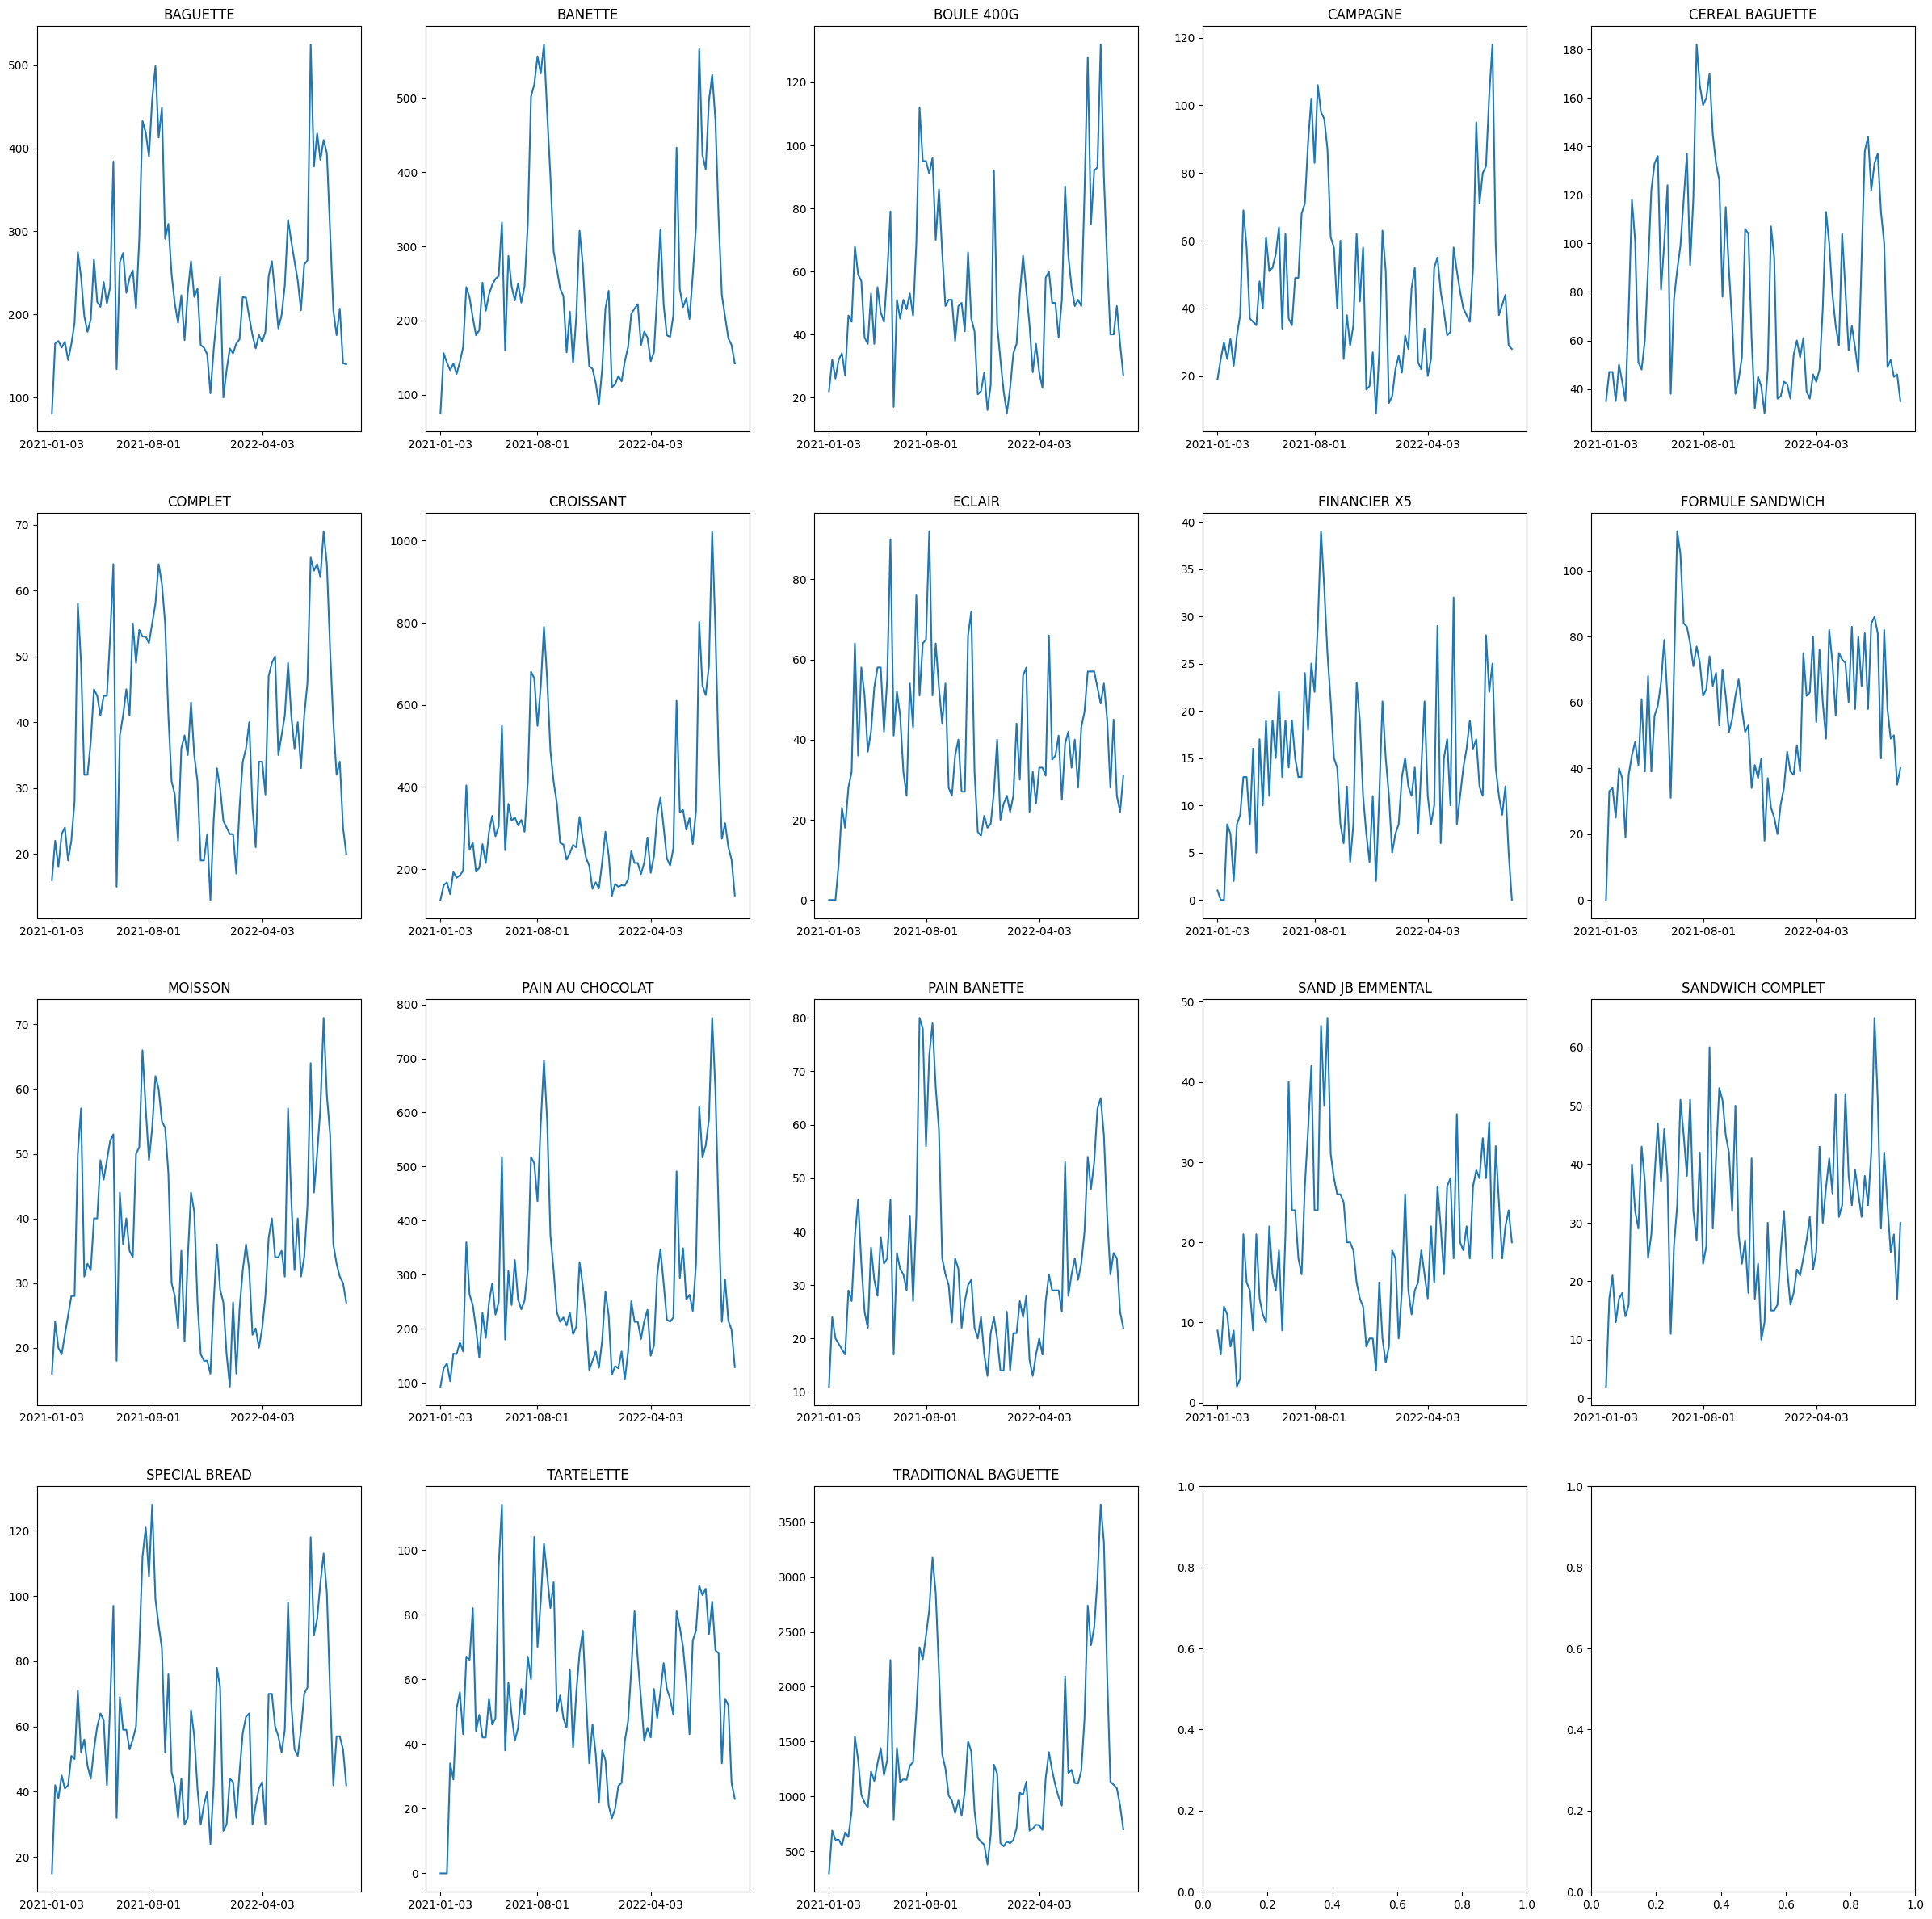

In [45]:
import math
import matplotlib.pyplot as plt

total_articulos = len(df_clase_A_week_pivot)
n_c = 5
n_f = math.ceil(total_articulos / n_c)

fig, axs = plt.subplots(n_f, n_c, figsize=(30,30))

# Ajustar la semana de corte a una fecha más cercana al 31 del 03 del 22
if "2022-03-31" in df_clase_A_week_pivot.columns:
    semana_corte = df_clase_A_week_pivot.columns[df_clase_A_week_pivot.columns.get_loc("2022-03-31") - 1]
else:
    # Buscar la fecha más cercana al 31 del 03 del 22
    fechas = pd.to_datetime(df_clase_A_week_pivot.columns[1:])
    fecha_objetivo = pd.to_datetime("2022-03-31")
    semana_corte = fechas[abs(fechas - fecha_objetivo).argmin()].strftime('%Y-%m-%d')

for i in range(0, len(df_clase_A_week_pivot)):
    ax = axs[i // n_c, i % n_c]
    ax.plot(df_clase_A_week_pivot.columns[1:], df_clase_A_week_pivot.iloc[i, 1:], label=df_clase_A_week_pivot.iloc[i, 0])
    ax.set_xticks([df_clase_A_week_pivot.columns[1], df_clase_A_week_pivot.columns[len(df_clase_A_week_pivot.columns)//3], semana_corte])
    ax.set_xticklabels([df_clase_A_week_pivot.columns[1], df_clase_A_week_pivot.columns[len(df_clase_A_week_pivot.columns)//3], semana_corte])
    ax.set_title(df_clase_A_week_pivot.iloc[i, 0])

plt.show()

/tmp/ipykernel_16277/554876805.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(serie_baguette.index, serie_baguette['BAGUETTE'], label="BAGUETTE", linestyle='-', marker='')


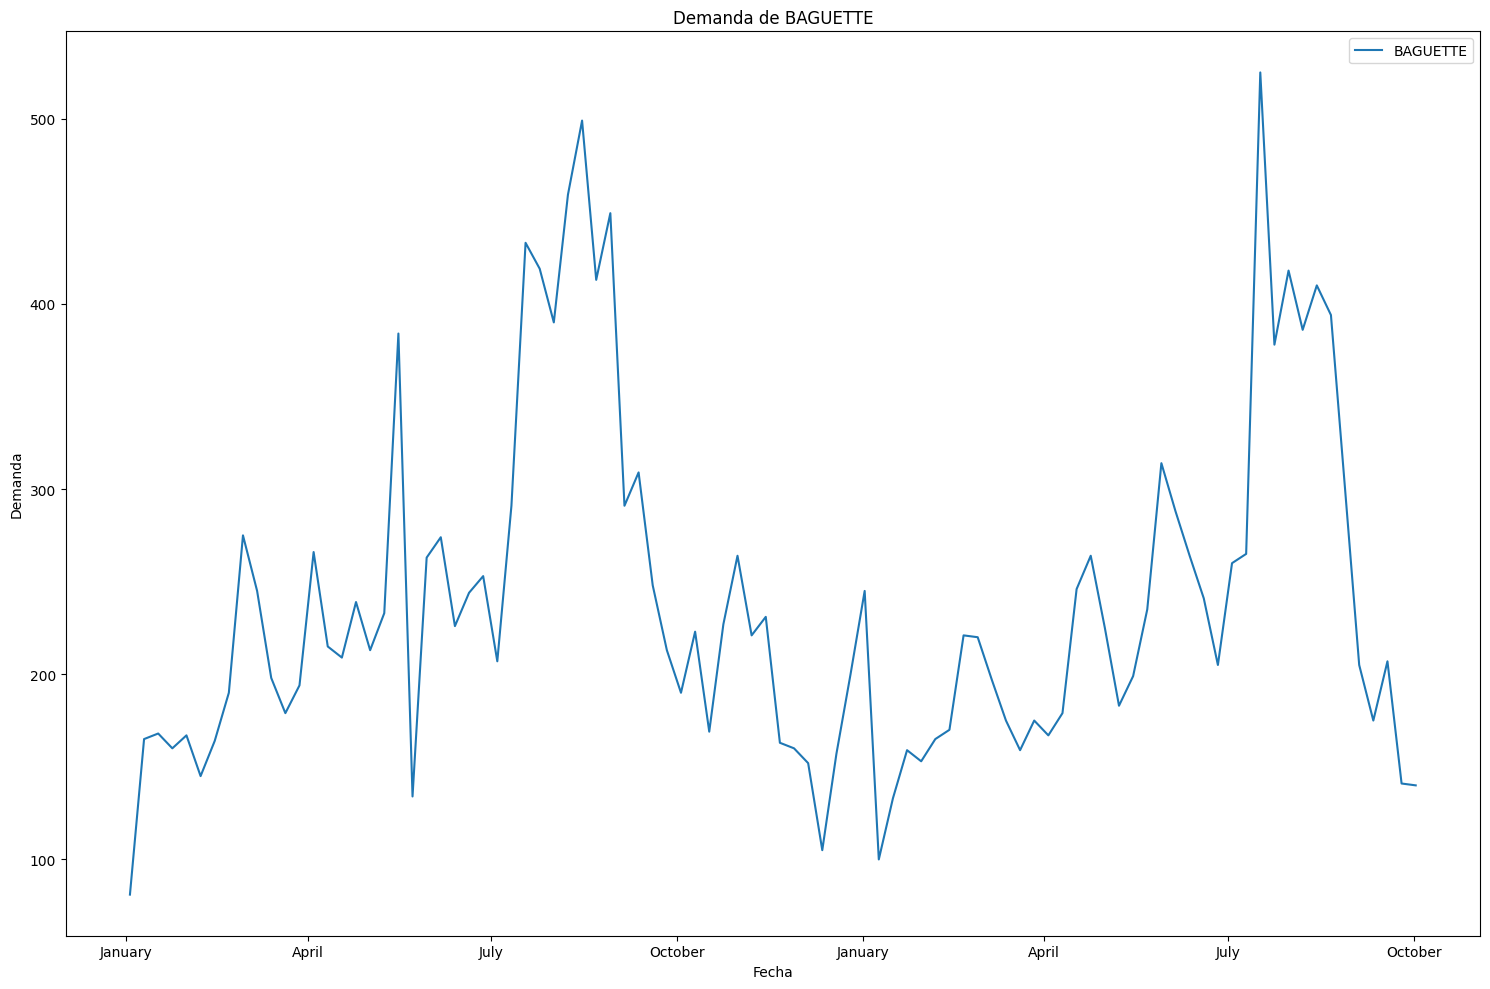

In [79]:
import matplotlib.dates as mdates

# Filtrar los datos de la serie_id "BAGUETTE"
serie_baguette = df_clase_A_week_pivot[df_clase_A_week_pivot['article'] == 'BAGUETTE'].set_index('article').T

# Convert index to DatetimeIndex
serie_baguette.index = pd.to_datetime(serie_baguette.index)

# Crear una figura para graficar la demanda de "BAGUETTE"
fig, ax = plt.subplots(figsize=(15, 10))

# Graficar la demanda de "BAGUETTE"
ax.plot_date(serie_baguette.index, serie_baguette['BAGUETTE'], label="BAGUETTE", linestyle='-', marker='')

# Formatear las etiquetas de fecha para mostrar el nombre del mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Añadir títulos y etiquetas
ax.set_title("Demanda de BAGUETTE")
ax.set_xlabel("Fecha")
ax.set_ylabel("Demanda")
ax.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()


## Estacionalidad
Teniendo en cuenta las estaciones del año en Europa (ya que el precio de los articulos esta en euros), se puede hacer un analisis de la estacionalidad de los productos.
- Primavera: De finales de marzo a finales de junio
- Verano: De finales de junio a finales de septiembre
- Otoño: De finales de septiembre a finales de diciembre
- Invierno: De finales de diciembre a finales de marzo

/tmp/ipykernel_16277/3139891601.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(serie_baguette.index, serie_baguette['BAGUETTE'], label="BAGUETTE", linestyle='-', marker='')


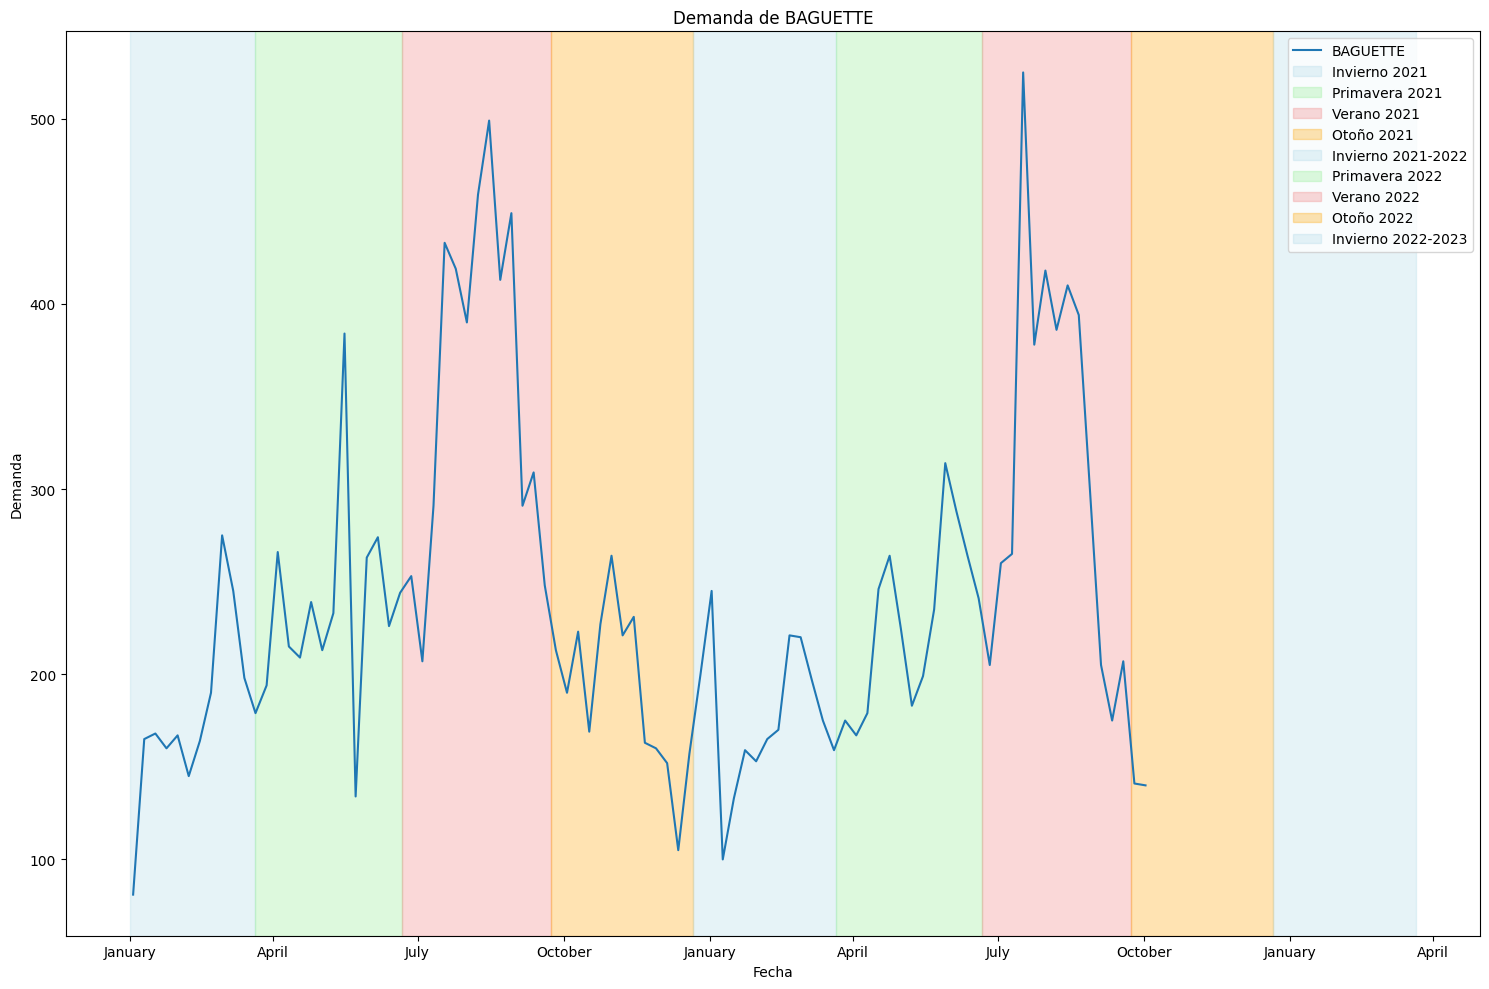

In [84]:
# Crear una figura para graficar la demanda de "BAGUETTE"
fig, ax = plt.subplots(figsize=(15, 10))

# Graficar la demanda de "BAGUETTE"
ax.plot_date(serie_baguette.index, serie_baguette['BAGUETTE'], label="BAGUETTE", linestyle='-', marker='')

# Formatear las etiquetas de fecha para mostrar el nombre del mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Añadir banda de colores desde el inicio de 2021 hasta la primavera de 2021-03
ax.axvspan(pd.to_datetime("2021-01-01"), pd.to_datetime("2021-03-21"), color='lightblue', alpha=0.3, label='Invierno 2021')

# Añadir bandas de colores para las estaciones en 2021
ax.axvspan(pd.to_datetime("2021-03-21"), pd.to_datetime("2021-06-21"), color='lightgreen', alpha=0.3, label='Primavera 2021')
ax.axvspan(pd.to_datetime("2021-06-21"), pd.to_datetime("2021-09-23"), color='lightcoral', alpha=0.3, label='Verano 2021')  # Cambiado a lightcoral
ax.axvspan(pd.to_datetime("2021-09-23"), pd.to_datetime("2021-12-21"), color='orange', alpha=0.3, label='Otoño 2021')
ax.axvspan(pd.to_datetime("2021-12-21"), pd.to_datetime("2022-03-21"), color='lightblue', alpha=0.3, label='Invierno 2021-2022')

# Añadir bandas de colores para las estaciones en 2022
ax.axvspan(pd.to_datetime("2022-03-21"), pd.to_datetime("2022-06-21"), color='lightgreen', alpha=0.3, label='Primavera 2022')
ax.axvspan(pd.to_datetime("2022-06-21"), pd.to_datetime("2022-09-23"), color='lightcoral', alpha=0.3, label='Verano 2022')  # Cambiado a lightcoral
ax.axvspan(pd.to_datetime("2022-09-23"), pd.to_datetime("2022-12-21"), color='orange', alpha=0.3, label='Otoño 2022')
ax.axvspan(pd.to_datetime("2022-12-21"), pd.to_datetime("2023-03-21"), color='lightblue', alpha=0.3, label='Invierno 2022-2023')

# Añadir títulos y etiquetas
ax.set_title("Demanda de BAGUETTE")
ax.set_xlabel("Fecha")
ax.set_ylabel("Demanda")
ax.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()


# Ingredientes

In [46]:
# agrupar por "date", sumando la demanda total de ese dia
df_agrupado_date = df.groupby(["article", "week"])["Quantity"].sum().reset_index()

df_clase_A_week = pd.merge(df_clase_A[["article"]], df_agrupado_week, on="article", how="left")

display(df_clase_A_week.head())

# Para facilitar la busqueda:
# Ahora hacemos otro dataframe con un indice en week y las columnas son las "Quantity" de articulos
df_clase_A_week = df_clase_A_week.pivot(index="week", columns="article", values="Quantity")

df_clase_A_week.fillna(0, inplace=True)

df_clase_A_week.head()

,article,week,Quantity
0,TRADITIONAL BAGUETTE,2021-01-03,299.0
1,TRADITIONAL BAGUETTE,2021-01-10,689.0
2,TRADITIONAL BAGUETTE,2021-01-17,605.0
3,TRADITIONAL BAGUETTE,2021-01-24,605.0
4,TRADITIONAL BAGUETTE,2021-01-31,553.0


article,BAGUETTE,BANETTE,BOULE 400G,CAMPAGNE,CEREAL BAGUETTE,COMPLET,CROISSANT,ECLAIR,FINANCIER X5,FORMULE SANDWICH,MOISSON,PAIN AU CHOCOLAT,PAIN BANETTE,SAND JB EMMENTAL,SANDWICH COMPLET,SPECIAL BREAD,TARTELETTE,TRADITIONAL BAGUETTE
week,,,,,,,,,,,,,,,,,,
2021-01-03,81.0,75.0,22.0,19.0,35.0,16.0,125.0,0.0,1.0,0.0,16.0,93.0,11.0,9.0,2.0,15.0,0.0,299.0
2021-01-10,165.0,156.0,32.0,25.0,47.0,22.0,161.0,0.0,0.0,33.0,24.0,127.0,24.0,6.0,17.0,42.0,0.0,689.0
2021-01-17,168.0,143.0,26.0,30.0,47.0,18.0,168.0,0.0,0.0,34.0,20.0,136.0,20.0,12.0,21.0,38.0,0.0,605.0
2021-01-24,160.0,133.0,32.0,25.0,35.0,23.0,139.0,9.0,8.0,25.0,19.0,103.0,19.0,11.0,13.0,45.0,34.0,605.0
2021-01-31,167.0,142.0,34.0,31.0,50.0,24.0,193.0,23.0,7.0,40.0,22.0,154.0,18.0,7.0,17.0,41.0,29.0,553.0


In [47]:
# Load the ingredients CSV file
df_ingredientes = pd.read_csv("../data/Ingredientes productos (A) - Ingredientes.csv", index_col=0)

# Eliminar columna Unidad
df_precio = df_ingredientes["Precio"]
df_ingredientes = df_ingredientes.drop(columns=["Unidad"])

#print("DF INGREDIENTE\n\n:", df_ingredientes.head())

#print(df_clase_A_week.info())

# interseccion de los nombres de articulos A y los nombre de articulos que aparecen en df_ingredientes
result = set(df_clase_A_week.columns) & set(df_ingredientes.columns)
print("\n\nTEST NOMBRES 1: ", result)

# convertir los todos los nombres de los articulos al mismo case en ambos dataframe
df_ingredientes.columns = df_ingredientes.columns.str.upper()

if len(set(df_clase_A_week.columns) - set(df_ingredientes.columns)) > 0:
    print(f"Faltan los ingredientes de los siguientes articulos: {set(df_clase_A_week.columns) - set(df_ingredientes.columns)}")

# quitar los articulos de df_ingredientes que no sean clase A
df_ingredientes = df_ingredientes.drop(columns=set(df_ingredientes.columns) - set(df_clase_A_week.columns))

# repetir el experimento y debe dar la cantidad que hay en A
result = set(df_clase_A_week.columns) & set(df_ingredientes.columns)
print("TEST NOMBRES 2: ", len(result),result)

df_ingredientes = df_ingredientes.T

df_ingredientes



TEST NOMBRES 1:  set()
TEST NOMBRES 2:  18 {'BAGUETTE', 'TRADITIONAL BAGUETTE', 'FINANCIER X5', 'PAIN BANETTE', 'BOULE 400G', 'BANETTE', 'CAMPAGNE', 'ECLAIR', 'CROISSANT', 'COMPLET', 'FORMULE SANDWICH', 'PAIN AU CHOCOLAT', 'SAND JB EMMENTAL', 'SPECIAL BREAD', 'SANDWICH COMPLET', 'CEREAL BAGUETTE', 'MOISSON', 'TARTELETTE'}


Ingrediente,Harina de trigo,Sal,Levadura,Mantequilla,Azúcar,Chocolate,Emmental,Pasas,Leche
TRADITIONAL BAGUETTE,500,10,5,0,0,0,0,0,0
FORMULE SANDWICH,300,5,5,0,10,0,0,0,50
CROISSANT,250,5,0,150,20,0,0,0,20
PAIN AU CHOCOLAT,250,5,0,150,0,100,0,0,20
BANETTE,500,10,5,0,0,0,0,0,0
BAGUETTE,500,10,5,0,0,0,0,0,0
SANDWICH COMPLET,250,3,2,50,10,0,0,0,0
SPECIAL BREAD,400,10,10,100,30,0,0,0,50
TARTELETTE,150,2,0,50,50,0,0,0,50
CEREAL BAGUETTE,500,10,5,0,0,0,0,0,0


In [48]:
print(df_ingredientes.loc[:, "Harina de trigo"])

articulos_usan_harina = df_ingredientes.loc[:, "Harina de trigo"].index.to_list()

print("\n\narticulos_usan_harina:", articulos_usan_harina)

print("\n\ndemanda Croissant: 2021-01-03", df_clase_A_week.loc["2021-01-03", "CROISSANT"])

# ejemplo, demanda de harina en 2021-01-03
print("\n\nDemanda articulos_usan_harina 2021-01-03:", df_clase_A_week.loc["2021-01-03", articulos_usan_harina])
print("\n\nDemanda de harina * cantidad necesaria 2021-01-03:", df_clase_A_week.loc["2021-01-03", articulos_usan_harina] * df_ingredientes.loc[:, "Harina de trigo"])

# esto funciona porque los articulos estan ordenados de la misma forma en ambos dataframe

TRADITIONAL BAGUETTE    500
FORMULE SANDWICH        300
CROISSANT               250
PAIN AU CHOCOLAT        250
BANETTE                 500
BAGUETTE                500
SANDWICH COMPLET        250
SPECIAL BREAD           400
TARTELETTE              150
CEREAL BAGUETTE         500
CAMPAGNE                500
BOULE 400G              400
ECLAIR                  100
MOISSON                 500
SAND JB EMMENTAL        300
COMPLET                 400
PAIN BANETTE            500
FINANCIER X5            200
Name: Harina de trigo, dtype: int64


articulos_usan_harina: ['TRADITIONAL BAGUETTE', 'FORMULE SANDWICH', 'CROISSANT', 'PAIN AU CHOCOLAT', 'BANETTE', 'BAGUETTE', 'SANDWICH COMPLET', 'SPECIAL BREAD', 'TARTELETTE', 'CEREAL BAGUETTE', 'CAMPAGNE', 'BOULE 400G', 'ECLAIR', 'MOISSON', 'SAND JB EMMENTAL', 'COMPLET', 'PAIN BANETTE', 'FINANCIER X5']


demanda Croissant: 2021-01-03 125.0


Demanda articulos_usan_harina 2021-01-03: article
TRADITIONAL BAGUETTE    299.0
FORMULE SANDWICH          0.0
CROI

In [49]:
# generamos un nuevo dataframe para calcular la demanda por dia de los ingredientes basado en el uso de cada articulo y la demanda de ese articulo en ese dia

# Crear un nuevo dataframe que contenga solo los ingredientes como filas y los días como columnas
semanas = df["week"].unique()
semanas.sort()

print("Cantidad de muestras: ", len(semanas))

df_demanda_ingrediente = pd.DataFrame(index=df_ingredientes.columns[1:], columns=semanas)

# Inicializar el dataframe con ceros
df_demanda_ingrediente = df_demanda_ingrediente.fillna(0)

for ingrediente, serie in df_ingredientes.items():
    consumo_x_articulo = serie
    articulos_usan_ingrediente = serie.index.to_list()
    for dia in semanas:
        df_demanda_ingrediente.loc[ingrediente, dia] = (df_clase_A_week.loc[dia, articulos_usan_harina] * df_ingredientes.loc[:, ingrediente]).sum()
        
#print(df_demanda_ingrediente.head())

df_demanda_ingrediente = df_demanda_ingrediente.T

# guardar
df_demanda_ingrediente.to_csv("../results/Bakery sales ingredientes por dia.csv")

df_demanda_ingrediente

Cantidad de muestras:  92


/tmp/ipykernel_16277/2511882596.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_demanda_ingrediente = df_demanda_ingrediente.fillna(0)


Ingrediente,Sal,Levadura,Mantequilla,Azúcar,Chocolate,Emmental,Pasas,Leche,Harina de trigo
2021-01-03,7015.0,3024.0,36230.0,3590.0,9300.0,900.0,0.0,6900.0,347100.0
2021-01-10,13934.0,6539.0,50670.0,5740.0,12700.0,600.0,0.0,11870.0,691350.0
2021-01-17,12939.0,5977.0,52590.0,5750.0,13600.0,1200.0,0.0,11700.0,644350.0
2021-01-24,12478.0,5856.0,47570.0,7780.0,10750.0,1100.0,0.0,13500.0,620150.0
2021-01-31,12968.0,5849.0,64240.0,9360.0,16550.0,700.0,0.0,16660.0,644250.0
...,...,...,...,...,...,...,...,...,...
2022-09-04,21573.0,9816.0,89350.0,12670.0,22700.0,2500.0,0.0,22990.0,1077800.0
2022-09-11,21430.0,9470.0,109560.0,15250.0,31350.0,1800.0,0.0,26640.0,1067600.0
2022-09-18,20481.0,9356.0,88140.0,13250.0,22800.0,2200.0,0.0,23300.0,1021150.0
2022-09-25,17215.0,7814.0,76830.0,10400.0,20900.0,2400.0,0.0,18760.0,857200.0


## Analisis ABC

In [50]:
## ABC Ingredientes
df_demanda_ingrediente_abc = df_demanda_ingrediente.T.copy()

#display(df_demanda_ingrediente_abc)

df_demanda_ingrediente_abc["DemandaTotal"] = df_demanda_ingrediente_abc.sum(axis=1)
for ingrediente in df_demanda_ingrediente_abc.index:
    try:
        precio = df_precio.loc[ingrediente]
        df_demanda_ingrediente_abc.loc[ingrediente, "DemandaValorizada"] = df_demanda_ingrediente_abc.loc[ingrediente, "DemandaTotal"] * precio
    except:
        print(f"No se encontro el precio para el ingrediente {ingrediente}")

# ordenar el DataFrame por la nueva columna, de forma descendente
df_demanda_ingrediente_abc = df_demanda_ingrediente_abc.sort_values(by="DemandaValorizada", ascending=False)

#display(df_demanda_ingrediente_abc)

# Calcular la demanda valorizada porcentual
total = df_demanda_ingrediente_abc["DemandaValorizada"].sum()
df_demanda_ingrediente_abc["DemandaValorizadaPorcentual"] = df_demanda_ingrediente_abc["DemandaValorizada"] / total * 100


df_demanda_ingrediente_abc["DemandaValorizadaPorcentualAcumulada"] = df_demanda_ingrediente_abc["DemandaValorizadaPorcentual"].cumsum()


#display(df_demanda_ingrediente_abc)


# Asignar el tipo A, B, C según la demanda valorizada porcentual acumulada
def asignar_tipo(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

df_demanda_ingrediente_abc["Tipo"] = df_demanda_ingrediente_abc["DemandaValorizadaPorcentualAcumulada"].apply(asignar_tipo)

display(df_demanda_ingrediente_abc)

# guardar
df_demanda_ingrediente_abc.to_csv("../results/Bakery sales ingredientes ABC.csv")

# Nos quedamos con los ingredientes de clase A y B
df_demanda_ingrediente_abc = df_demanda_ingrediente_abc[df_demanda_ingrediente_abc["Tipo"].isin(["A", "B"])]

# Filtrar tambien en df_demanda_ingrediente
df_demanda_ingrediente = df_demanda_ingrediente[df_demanda_ingrediente_abc.index]

display(df_demanda_ingrediente)

,2021-01-03,2021-01-10,2021-01-17,2021-01-24,2021-01-31,2021-02-07,2021-02-14,2021-02-21,2021-02-28,2021-03-07,...,2022-09-04,2022-09-11,2022-09-18,2022-09-25,2022-10-02,DemandaTotal,DemandaValorizada,DemandaValorizadaPorcentual,DemandaValorizadaPorcentualAcumulada,Tipo
Ingrediente,,,,,,,,,,,,,,,,,,,,,
Harina de trigo,347100.0,691350.0,644350.0,620150.0,644250.0,672350.0,691700.0,858550.0,1489350.0,1270500.0,...,1077800.0,1067600.0,1021150.0,857200.0,680900.0,113640400.0,6818424.00,53.562436,53.562436,A
Mantequilla,36230.0,50670.0,52590.0,47570.0,64240.0,61930.0,69140.0,68460.0,141220.0,97750.0,...,89350.0,109560.0,88140.0,76830.0,52450.0,10110040.0,4246216.80,33.356347,86.918782,B
Levadura,3024.0,6539.0,5977.0,5856.0,5849.0,6131.0,6288.0,8017.0,13350.0,11724.0,...,9816.0,9470.0,9356.0,7814.0,6385.0,1030106.0,793181.62,6.230874,93.149656,B
Chocolate,9300.0,12700.0,13600.0,10750.0,16550.0,16200.0,18900.0,17400.0,39200.0,28100.0,...,22700.0,31350.0,22800.0,20900.0,14450.0,2706300.0,649512.00,5.102271,98.251927,C
Leche,6900.0,11870.0,11700.0,13500.0,16660.0,16530.0,18220.0,18960.0,34490.0,27050.0,...,22990.0,26640.0,23300.0,18760.0,14650.0,2552420.0,127621.00,1.002532,99.254459,C
Emmental,900.0,600.0,1200.0,1100.0,700.0,900.0,200.0,300.0,2100.0,1500.0,...,2500.0,1800.0,2200.0,2400.0,2000.0,179200.0,43008.00,0.337851,99.592310,C
Azúcar,3590.0,5740.0,5750.0,7780.0,9360.0,9720.0,10960.0,11030.0,20040.0,14830.0,...,12670.0,15250.0,13250.0,10400.0,8320.0,1454810.0,29096.20,0.228567,99.820877,C
Sal,7015.0,13934.0,12939.0,12478.0,12968.0,13486.0,13975.0,17307.0,29965.0,25517.0,...,21573.0,21430.0,20481.0,17215.0,13644.0,2280213.0,22802.13,0.179123,100.000000,C
Pasas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,100.000000,C


Ingrediente,Harina de trigo,Mantequilla,Levadura
2021-01-03,347100.0,36230.0,3024.0
2021-01-10,691350.0,50670.0,6539.0
2021-01-17,644350.0,52590.0,5977.0
2021-01-24,620150.0,47570.0,5856.0
2021-01-31,644250.0,64240.0,5849.0
...,...,...,...
2022-09-04,1077800.0,89350.0,9816.0
2022-09-11,1067600.0,109560.0,9470.0
2022-09-18,1021150.0,88140.0,9356.0
2022-09-25,857200.0,76830.0,7814.0


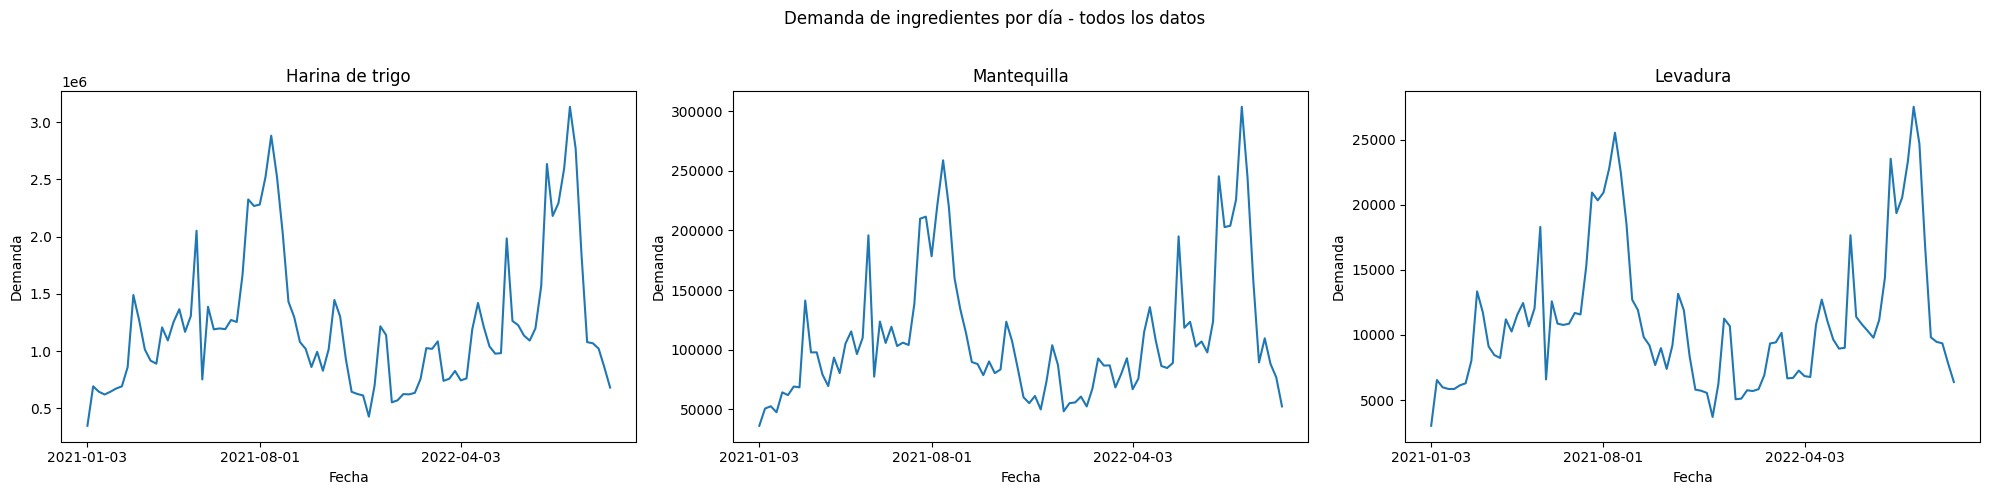

In [51]:
import math
import matplotlib.pyplot as plt

# Crear una figura con subplots
n_c = 3  # Número de columnas
n_f = math.ceil(len(df_demanda_ingrediente.columns) / n_c)  # Número de filas
fig, axs = plt.subplots(n_f, n_c, figsize=(20, 5 * n_f))
axs = axs.flatten()

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_demanda_ingrediente.columns):
    ax = axs[i]
    ax.plot(df_demanda_ingrediente.index, df_demanda_ingrediente[ingrediente])
    ax.set_title(ingrediente)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Demanda")
    # x label en inicio, 1/3 y fin de dato
    ax.set_xticks([df_demanda_ingrediente.index[0], df_demanda_ingrediente.index[len(df_demanda_ingrediente.index)//3], semana_corte])
    ax.set_xticklabels([df_demanda_ingrediente.index[0], df_demanda_ingrediente.index[len(df_demanda_ingrediente.index)//3], semana_corte])

# Título de la figura
fig.suptitle("Demanda de ingredientes por día - todos los datos")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()

## Pronostico de demanda de ingrediente

fuente https://forecastegy.com/posts/multiple-time-series-forecasting-with-holt-winters-in-python

In [52]:
if df_demanda_ingrediente.columns[0] != "ds":
    # "StatsForecast expects the data to have at least 3 columns: ds, unique_id, and y."
    # usar el indice default
    df_demanda_ingrediente = df_demanda_ingrediente.reset_index()
    df_demanda_ingrediente = df_demanda_ingrediente.rename(columns={"index": "ds"})
    df_demanda_ingrediente = df_demanda_ingrediente.melt(id_vars="ds", var_name="unique_id", value_name="y")

# "The model won’t work if you have zeros, negative, or missing values in the data."
# si hay un 0, se reemplaza por el promedio de los dos valores anteriores y siguientes
for i in range(1, len(df_demanda_ingrediente) - 1):
    if df_demanda_ingrediente.loc[i, "y"] == 0:
        df_demanda_ingrediente.loc[i, "y"] = (df_demanda_ingrediente.loc[i - 1, "y"] + df_demanda_ingrediente.loc[i + 1, "y"]) / 2

for i in range(1, len(df_demanda_ingrediente) - 1):
    if df_demanda_ingrediente.loc[i, "y"] < 1:
        print("Hay un 0 en el indice ", i)

df_demanda_ingrediente = df_demanda_ingrediente.sort_values(by="ds")

# ds debe ser tipo datetime
df_demanda_ingrediente['ds'] = pd.to_datetime(df_demanda_ingrediente['ds'])

df_demanda_ingrediente.head()

,ds,unique_id,y
0,2021-01-03,Harina de trigo,347100.0
184,2021-01-03,Levadura,3024.0
92,2021-01-03,Mantequilla,36230.0
1,2021-01-10,Harina de trigo,691350.0
185,2021-01-10,Levadura,6539.0


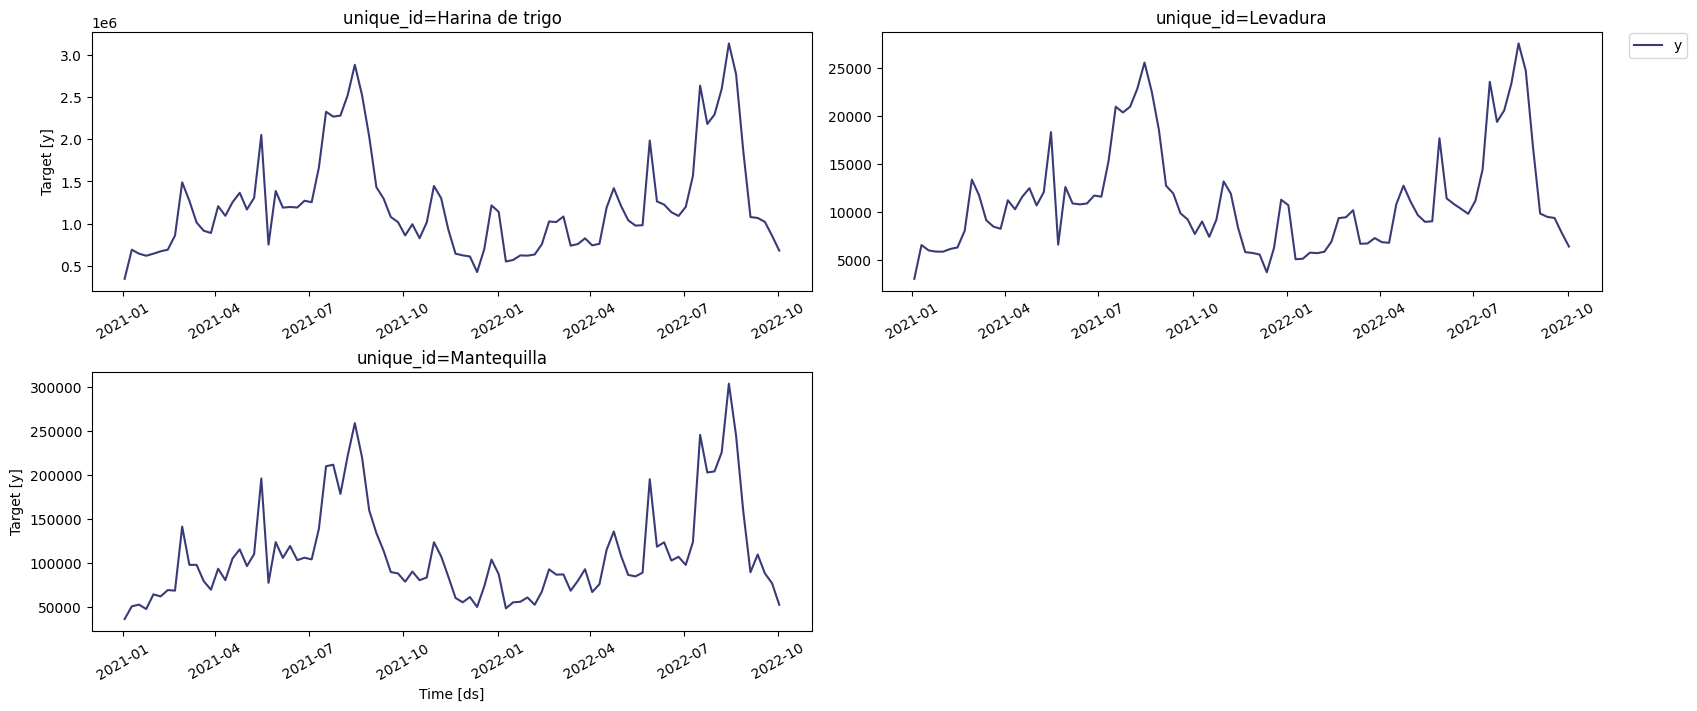

In [53]:
from statsforecast import StatsForecast

StatsForecast.plot(df_demanda_ingrediente)

In [55]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# periodos = [7, 14, 30, 60, 90, 150, 210, 270] 
# decompositions = {}
# for period in periodos:
#     decompositions[period] = seasonal_decompose(
#         df_demanda_ingrediente.loc[df_demanda_ingrediente["unique_id"] == "Sal"]["y"],
#         model="additive",
#         period=period
#     )

# fig, axs = plt.subplots(len(periodos), 4, figsize=(30, 5 * len(periodos)))

# for row, period in enumerate(periodos):
#     decompositions[period].observed.plot(ax=axs[row, 0], title=f'Observed (Periodo={period})')
#     decompositions[period].trend.plot(ax=axs[row, 1], title=f'Trend (Periodo={period})')
#     decompositions[period].seasonal.plot(ax=axs[row, 2], title=f'Seasonal (Periodo={period})')
#     decompositions[period].resid.plot(ax=axs[row, 3], title=f'Residual (Periodo={period})')

# plt.tight_layout()
# plt.show()


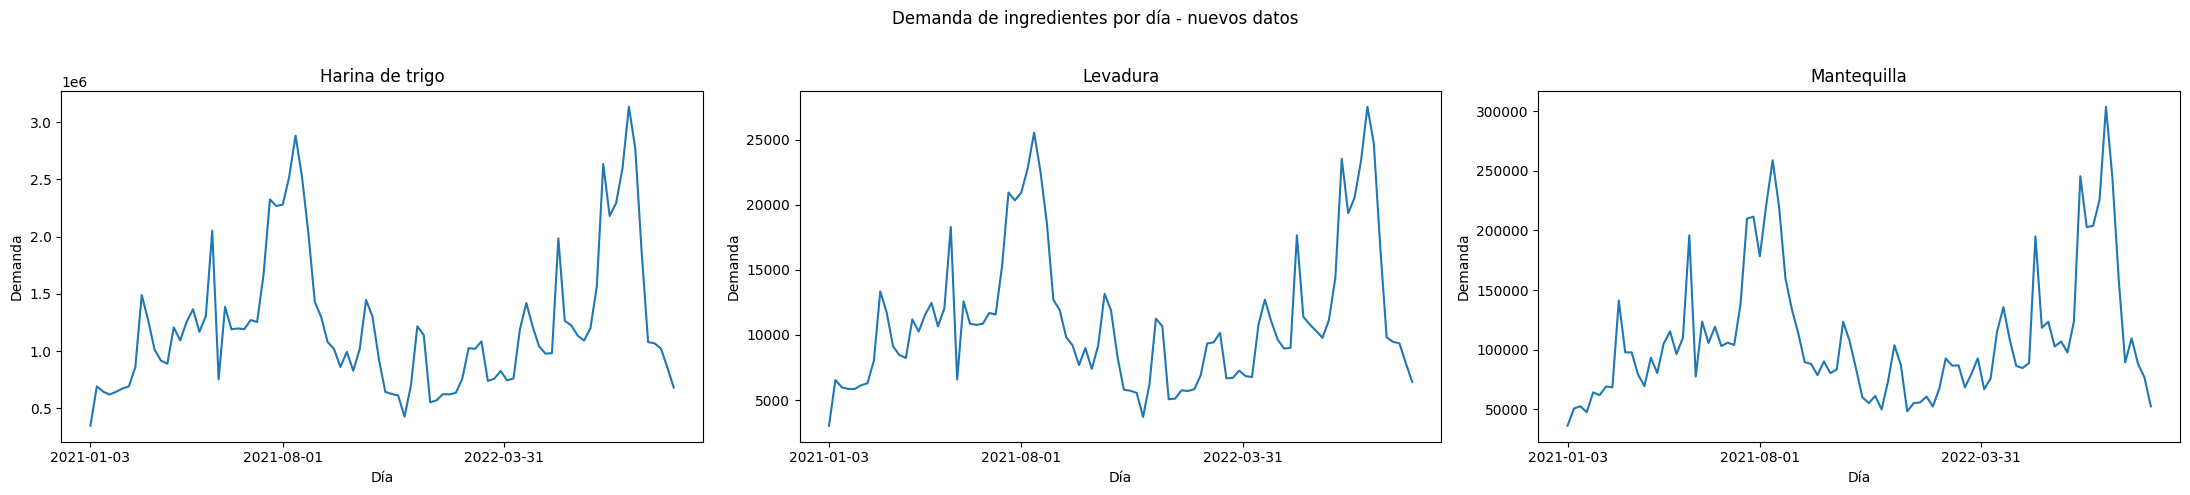

In [56]:
# Graficar las series de tiempo con los nuevos datos

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy

# Crear una figura con subplots
n_c = 3  # Número de columnas
n_f = math.ceil(len(df_demanda_ingrediente['unique_id'].unique()) / n_c)  # Número de filas
fig, axs = plt.subplots(n_f, n_c, figsize=(22, 5))

def isodate(t):
    return numpy.datetime_as_string(t, unit='D')

# flat axes
axs = axs.flatten()

# Iterar sobre cada ingrediente y graficar su demanda por día
for i, ingrediente in enumerate(df_demanda_ingrediente['unique_id'].unique()):
    ax = axs[i]
    df_ingrediente = df_demanda_ingrediente[df_demanda_ingrediente['unique_id'] == ingrediente]
    ax.plot(df_ingrediente['ds'], df_ingrediente['y'])
    ax.set_title(ingrediente)
    ax.set_xlabel("Día")
    ax.set_ylabel("Demanda")
    # Formatear las etiquetas de fecha
    # x label en inicio, 1/3 y fin de dato
    ax.set_xticks([isodate(df_ingrediente['ds'].values[0]), isodate(df_ingrediente['ds'].values[len(df_ingrediente['ds'])//3]), '2022-03-31'])
    ax.set_xticklabels([isodate(df_ingrediente['ds'].values[0]), isodate(df_ingrediente['ds'].values[len(df_ingrediente['ds'])//3]), '2022-03-31'])

# Título de la figura
fig.suptitle("Demanda de ingredientes por día - nuevos datos")
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la figura
plt.show()

In [57]:
# los datos van desde 2021-01-02 a 2022-09-30. En 2022 solo tengo 3 trimestres por lo que tomo los ultimos 2 para validación. 
# Es decir, comienzo en 2021-01-02 y termino en 2022-03-31
datos_entrenamiento = df_demanda_ingrediente.loc[df_demanda_ingrediente["ds"] <= "2022-03-31"]
datos_verificacion = df_demanda_ingrediente.loc[df_demanda_ingrediente["ds"] > "2022-03-31"]

# total muestras para verifiacion
h = datos_verificacion['ds'].nunique()

print(f"h={h}")

from statsforecast import StatsForecast
from statsforecast.models import HoltWinters

model = StatsForecast(models=[HoltWinters(season_length=52, error_type='A', alias='HW_A'),
                              HoltWinters(season_length=52, error_type='M', alias='HW_M')], 
                              freq='W', n_jobs=-1)
model.fit(datos_entrenamiento)

h=27


StatsForecast(models=[HW_A,HW_M])

> For example, data with daily observations might have a weekly seasonality (frequency=7) or an annual seasonality (frequency=365.25)
>
> https://robjhyndman.com/hyndsight/seasonal-periods/

In [58]:
p = model.predict(h=h, level=[90])

p.reset_index().head()

/home/ez/projects/python/Operativa/io-abc-xyz/.venv/lib/python3.10/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,unique_id,ds,HW_A,HW_A-lo-90,HW_A-hi-90,HW_M,HW_M-lo-90,HW_M-hi-90
0,Harina de trigo,2022-04-03,1.183387e+06,690488.706829,1.676285e+06,1.185658e+06,582723.712625,1.788592e+06
1,Harina de trigo,2022-04-10,1.068987e+06,576083.696646,1.561890e+06,1.079330e+06,476396.096841,1.682264e+06
2,Harina de trigo,2022-04-17,1.230273e+06,737363.804839,1.723183e+06,1.234011e+06,631077.071412,1.836945e+06
3,Harina de trigo,2022-04-24,1.342399e+06,849482.294078,1.835316e+06,1.338799e+06,735865.189028,1.941734e+06
4,Harina de trigo,2022-05-01,1.143051e+06,650125.111520,1.635977e+06,1.138008e+06,535073.663092,1.740942e+06


In [59]:

p = p.reset_index().merge(datos_verificacion, on=['ds', 'unique_id'], how='left')

p.reset_index().head()

,index,unique_id,ds,HW_A,HW_A-lo-90,HW_A-hi-90,HW_M,HW_M-lo-90,HW_M-hi-90,y
0,0,Harina de trigo,2022-04-03,1.183387e+06,690488.706829,1.676285e+06,1.185658e+06,582723.712625,1.788592e+06,743400.0
1,1,Harina de trigo,2022-04-10,1.068987e+06,576083.696646,1.561890e+06,1.079330e+06,476396.096841,1.682264e+06,760900.0
2,2,Harina de trigo,2022-04-17,1.230273e+06,737363.804839,1.723183e+06,1.234011e+06,631077.071412,1.836945e+06,1189800.0
3,3,Harina de trigo,2022-04-24,1.342399e+06,849482.294078,1.835316e+06,1.338799e+06,735865.189028,1.941734e+06,1419950.0
4,4,Harina de trigo,2022-05-01,1.143051e+06,650125.111520,1.635977e+06,1.138008e+06,535073.663092,1.740942e+06,1211400.0


/tmp/ipykernel_16277/684607459.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p['y'] = p['y'].fillna(method='ffill')



Resultados de la validación:
	HW_A MAPE: 18.12%
	HW_M MAPE: 18.25%

Mejor MAPE entre aditivo y multiplicativo es HW_A con 18.12%


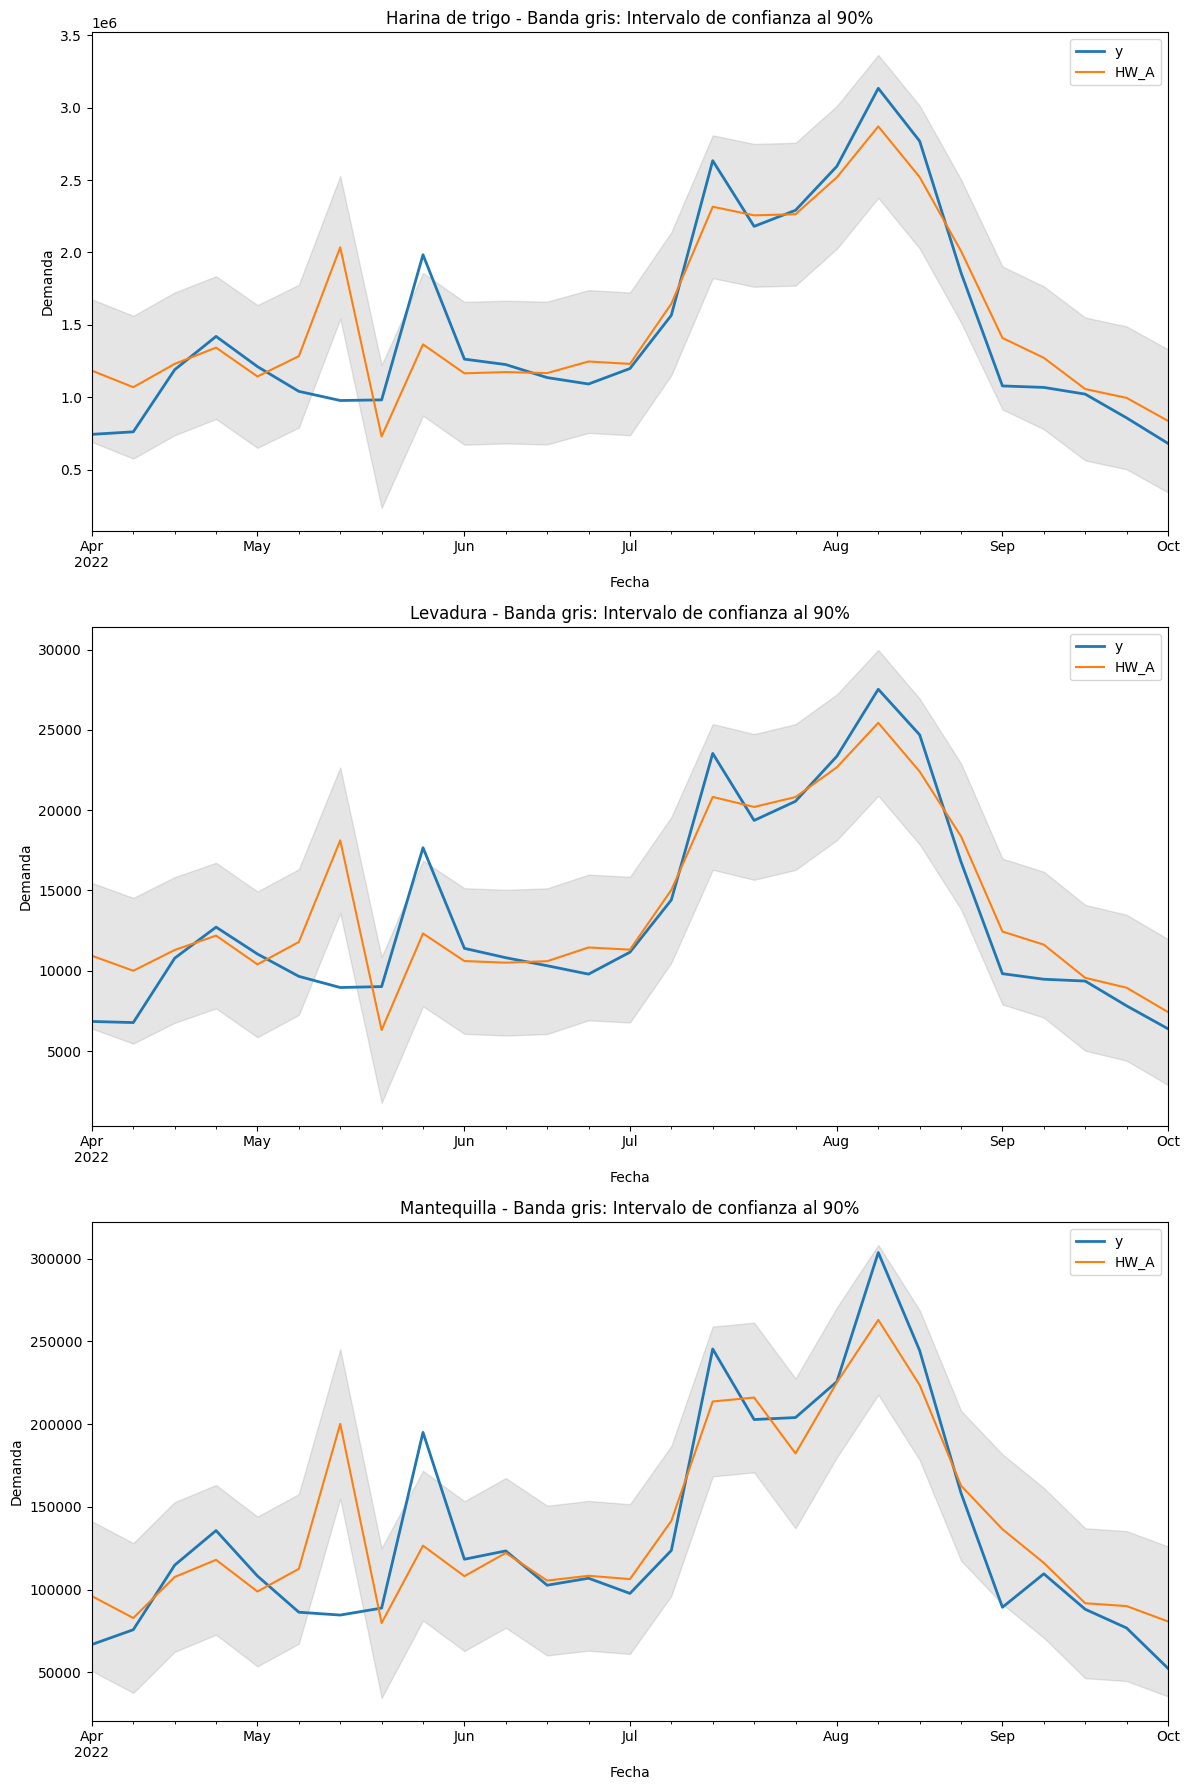

In [60]:
# Rellenar los valores faltantes en la verificacion con el último valor conocido
p['y'] = p['y'].fillna(method='ffill')

from sklearn.metrics import mean_absolute_percentage_error

unique_ids = p['unique_id'].unique()
num_unique_ids = len(unique_ids)

model_mape_ = {model_: mean_absolute_percentage_error(p['y'], p[model_]) for model_ in ['HW_A', 'HW_M']}
model_, mape_ = min(model_mape_.items(), key=lambda x: x[1])

print(f'\nResultados de la validación:')

for a, b in model_mape_.items():
    print(f'\t{a} MAPE: {b:.2%}')

print(f'\nMejor MAPE entre aditivo y multiplicativo es {model_} con {mape_:.2%}')

#for model_ in ['HW_A', 'HW_M']:
#print(f'{model_} MAPE: {mape_:.2%}')
fig, ax = plt.subplots(num_unique_ids, 1, figsize=(12, 6 * num_unique_ids))  # Increase height
for ax_, device in enumerate(unique_ids):
    p_device = p[p['unique_id'] == device]
    p_device.plot(x='ds', y='y', ax=ax[ax_], label='y', title=device, linewidth=2)
    p_device.plot(x='ds', y=model_, ax=ax[ax_], label=model_)
    ax[ax_].set_xlabel('Fecha')
    ax[ax_].set_ylabel('Demanda')
    ax[ax_].fill_between(p_device['ds'].values,
                            p_device[f'{model_}-lo-90'], 
                            p_device[f'{model_}-hi-90'], 
                            alpha=0.2,
                            color='gray')
    ax[ax_].set_title(f'{device} - Banda gris: Intervalo de confianza al 90%')
    ax[ax_].legend()
fig.tight_layout()
plt.show()

# Probando diferentes modelos

Vamos a descomponer la serie de tiempo de la demanda de ingredientes en sus componentes: tendencia, estacionalidad y residuo.

In [61]:
serie_id = "Harina de trigo"
serie_verificacion = datos_verificacion[datos_verificacion["unique_id"] == serie_id].set_index("ds")["y"]
serie_verificacion.head()

ds
2022-04-03     743400.0
2022-04-10     760900.0
2022-04-17    1189800.0
2022-04-24    1419950.0
2022-05-01    1211400.0
Name: y, dtype: float64

## Suavizado exponencial
Media móvil ponderada exponencialmente

/home/ez/projects/python/Operativa/io-abc-xyz/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


SES MAPE: 36.89%


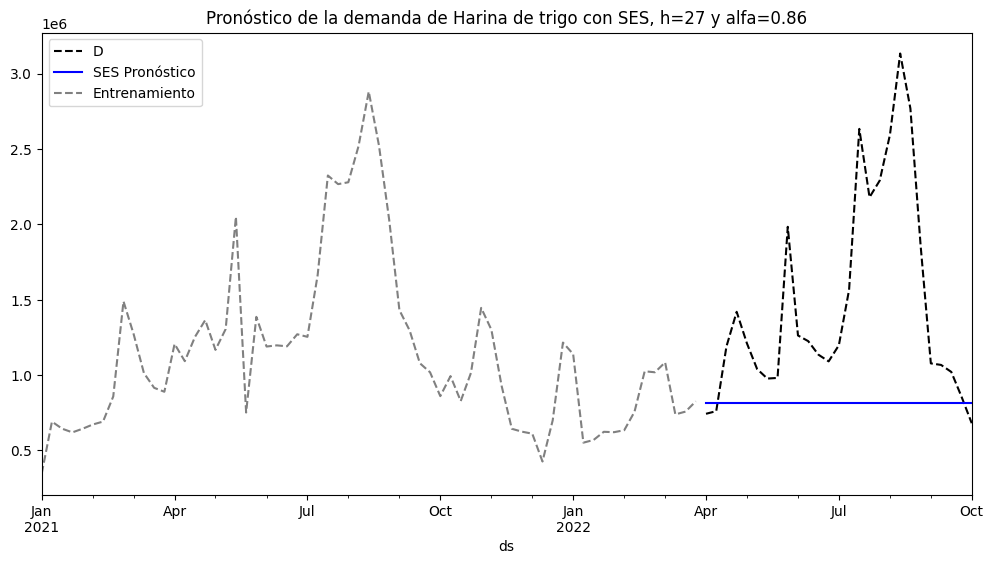

In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

serie = datos_entrenamiento[datos_entrenamiento["unique_id"] == serie_id].set_index("ds")["y"]
serie.index = pd.DatetimeIndex(serie.index).to_period('W')

ses_model = SimpleExpSmoothing(serie).fit()
ses_pronostico = ses_model.forecast(steps=h)

# Calcular el MAPE
e = mean_absolute_percentage_error(serie_verificacion, ses_pronostico)
print(f"SES MAPE: {e:.2%}")

# plot
fig, ax = plt.subplots(figsize=(12, 6))
serie_verificacion.plot(ax=ax, color='black', linestyle='--', label='D')
ses_pronostico.plot(ax=ax, color='blue', label='SES Pronóstico')
serie.plot(ax=ax, linestyle='--', color='gray', label='Entrenamiento')
ax.legend()
ax.set_title(f'Pronóstico de la demanda de {serie_id} con SES, h={h} y alfa={ses_model.model.params["smoothing_level"]:.2f}')
plt.show()

## Holt
Modelo de tendencia, extensión del suavizado exponencial.

/home/ez/projects/python/Operativa/io-abc-xyz/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt MAPE: 40.68%


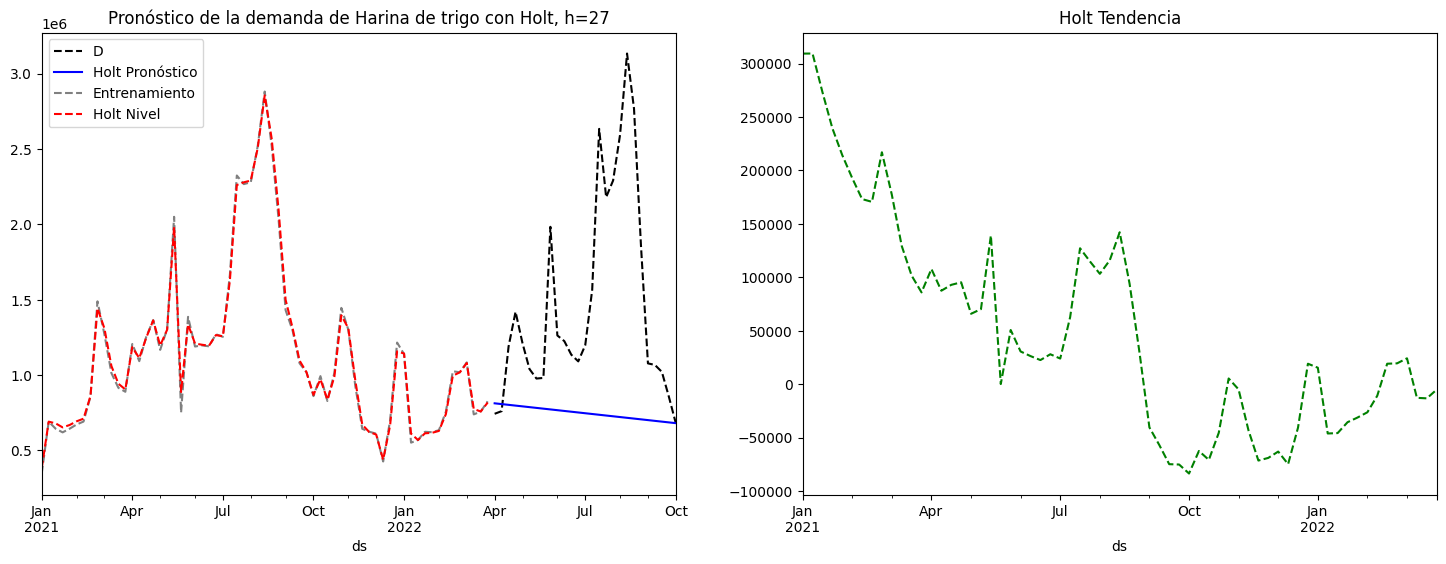

In [63]:
from statsmodels.tsa.holtwinters import Holt

holt_modelo = Holt(serie).fit()

holt_pronostico = holt_modelo.forecast(steps=h)

# Calcular el MAPE
e = mean_absolute_percentage_error(serie_verificacion, holt_pronostico)
print(f"Holt MAPE: {e:.2%}")

# plot
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
serie_verificacion.plot(ax=ax, color='black', linestyle='--', label='D')
holt_pronostico.plot(ax=ax, color='blue', label='Holt Pronóstico')
serie.plot(ax=ax, linestyle='--', color='gray', label='Entrenamiento')
holt_modelo.level.plot(ax=ax, color='red', linestyle='--', label='Holt Nivel')
ax.legend()
ax.set_title(f'Pronóstico de la demanda de {serie_id} con Holt, h={h}')

holt_modelo.trend.plot(ax=ax2, color='green', linestyle='--', label='Holt Tendencia')
ax2.set_title(f'Holt Tendencia')

plt.show()

## Holt-Winters
Modelo estacional, extiende el modelo de Holt.

/home/ez/projects/python/Operativa/io-abc-xyz/.venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


HWES MAPE: 152.80%


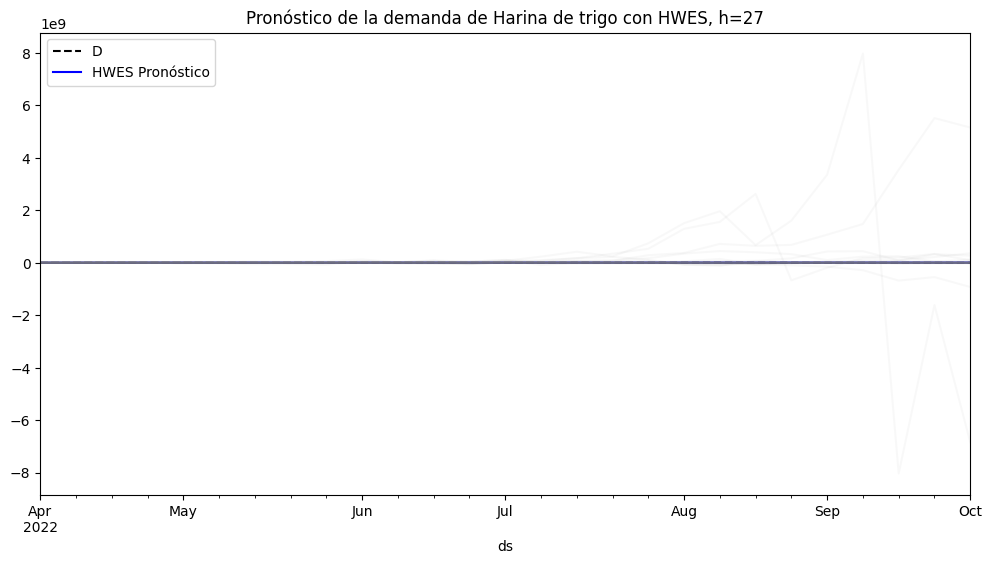

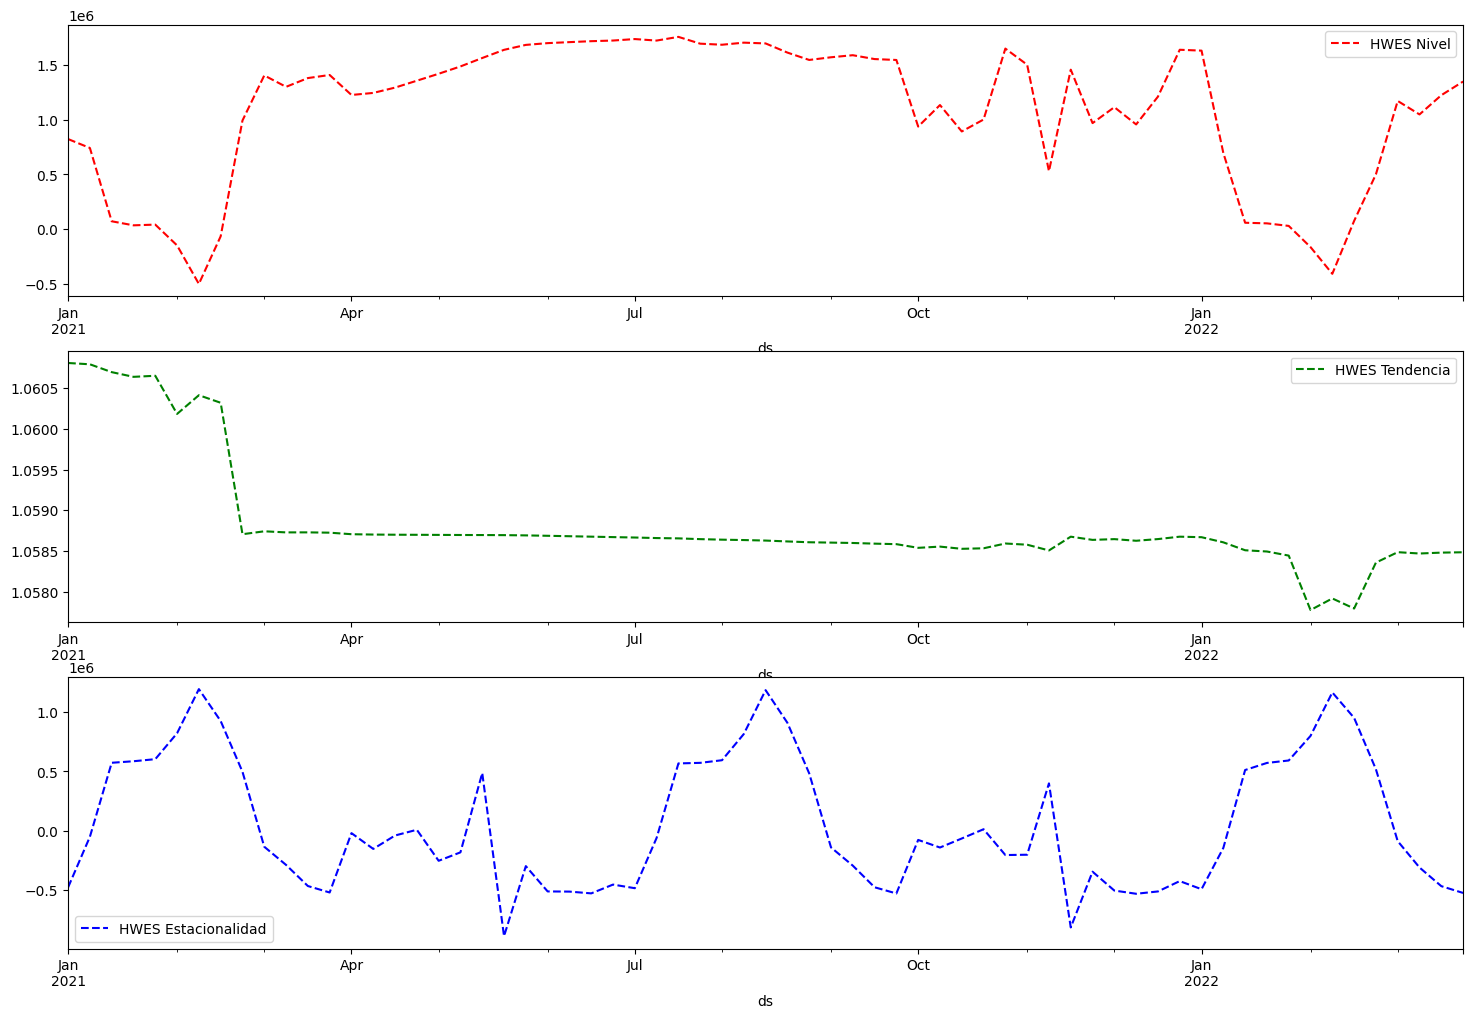

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hwes_model = ExponentialSmoothing(
        serie, 
        seasonal='add', 
        trend="mul",
        seasonal_periods=26, 
        initialization_method="estimated",
        #use_boxcox=True
        ).fit()

hwes_forecast = hwes_model.forecast(steps=h)

# interavlo de confianza
simulations = hwes_model.simulate(h, repetitions=50, error="mul")
# filter only the last h steps
simulations = simulations[simulations.index > serie.index[-1]]

# Calcular el MAPE
e = mean_absolute_percentage_error(serie_verificacion, hwes_forecast)
print(f"HWES MAPE: {e:.2%}")

# plot
fig, ax = plt.subplots(figsize=(12, 6))
serie_verificacion.plot(ax=ax, color='black', linestyle='--', label='D')
hwes_forecast.plot(ax=ax, color='blue', label='HWES Pronóstico')
ax.legend()
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
#serie.plot(ax=ax, linestyle='--', color='gray', label='Entrenamiento')
ax.set_title(f'Pronóstico de la demanda de {serie_id} con HWES, h={h}')
plt.show()

# plot level, trend, seasonal
fig, (ax, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))
hwes_model.level.plot(ax=ax, color='red', linestyle='--', label='HWES Nivel')
hwes_model.trend.plot(ax=ax2, color='green', linestyle='--', label='HWES Tendencia')
hwes_model.season.plot(ax=ax3, color='blue', linestyle='--', label='HWES Estacionalidad')
ax.legend()
ax2.legend()
ax3.legend()
plt.show()

In [65]:
# Pronosticar la demanda hasta el fin de 2022 usando StatsForecast

# Definir el horizonte de pronóstico
h = (pd.to_datetime("2022-12-31") - datos_verificacion["ds"].max()).days

# Ajustar el modelo con todos los datos disponibles
model.fit(df_demanda_ingrediente)

# Realizar el pronóstico
forecast = model.predict(h=h)

# Mostrar los primeros resultados del pronóstico
forecast.reset_index().head()

/home/ez/projects/python/Operativa/io-abc-xyz/.venv/lib/python3.10/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,unique_id,ds,HW_A,HW_M
0,Harina de trigo,2022-10-09,9.210581e+05,9.385825e+05
1,Harina de trigo,2022-10-16,7.564383e+05,7.744061e+05
2,Harina de trigo,2022-10-23,9.380286e+05,9.531231e+05
3,Harina de trigo,2022-10-30,1.367205e+06,1.333113e+06
4,Harina de trigo,2022-11-06,1.222175e+06,1.210965e+06


In [66]:
# Componer un dataframe final con todos los datos desde el inicio hasta el fin (existentes + pronóstico)

# Concatenar los datos de entrenamiento, verificación y pronóstico
forecast['y'] = forecast['HW_A'] 
forecast = forecast.drop(columns=['HW_A', 'HW_M', 'HW_A-lo-90', 'HW_A-hi-90', 'HW_M-lo-90', 'HW_M-hi-90'], errors='ignore')
df_final = pd.concat([datos_entrenamiento, datos_verificacion, forecast])

# Ordenar por fecha y artículo
df_final = df_final.sort_values(by=["unique_id", "ds"])

# Guardar el dataframe final en un archivo CSV
df_final.to_csv("../results/Bakery sales final with forecast.csv", index=False)

df_final

,ds,unique_id,y
0,2021-01-03,Harina de trigo,3.471000e+05
1,2021-01-10,Harina de trigo,6.913500e+05
2,2021-01-17,Harina de trigo,6.443500e+05
3,2021-01-24,Harina de trigo,6.201500e+05
4,2021-01-31,Harina de trigo,6.442500e+05
...,...,...,...
Levadura,2024-06-16,NaN,8.667809e+03
Mantequilla,2024-06-16,NaN,1.002338e+05
Harina de trigo,2024-06-23,NaN,1.043228e+06
Levadura,2024-06-23,NaN,9.428394e+03


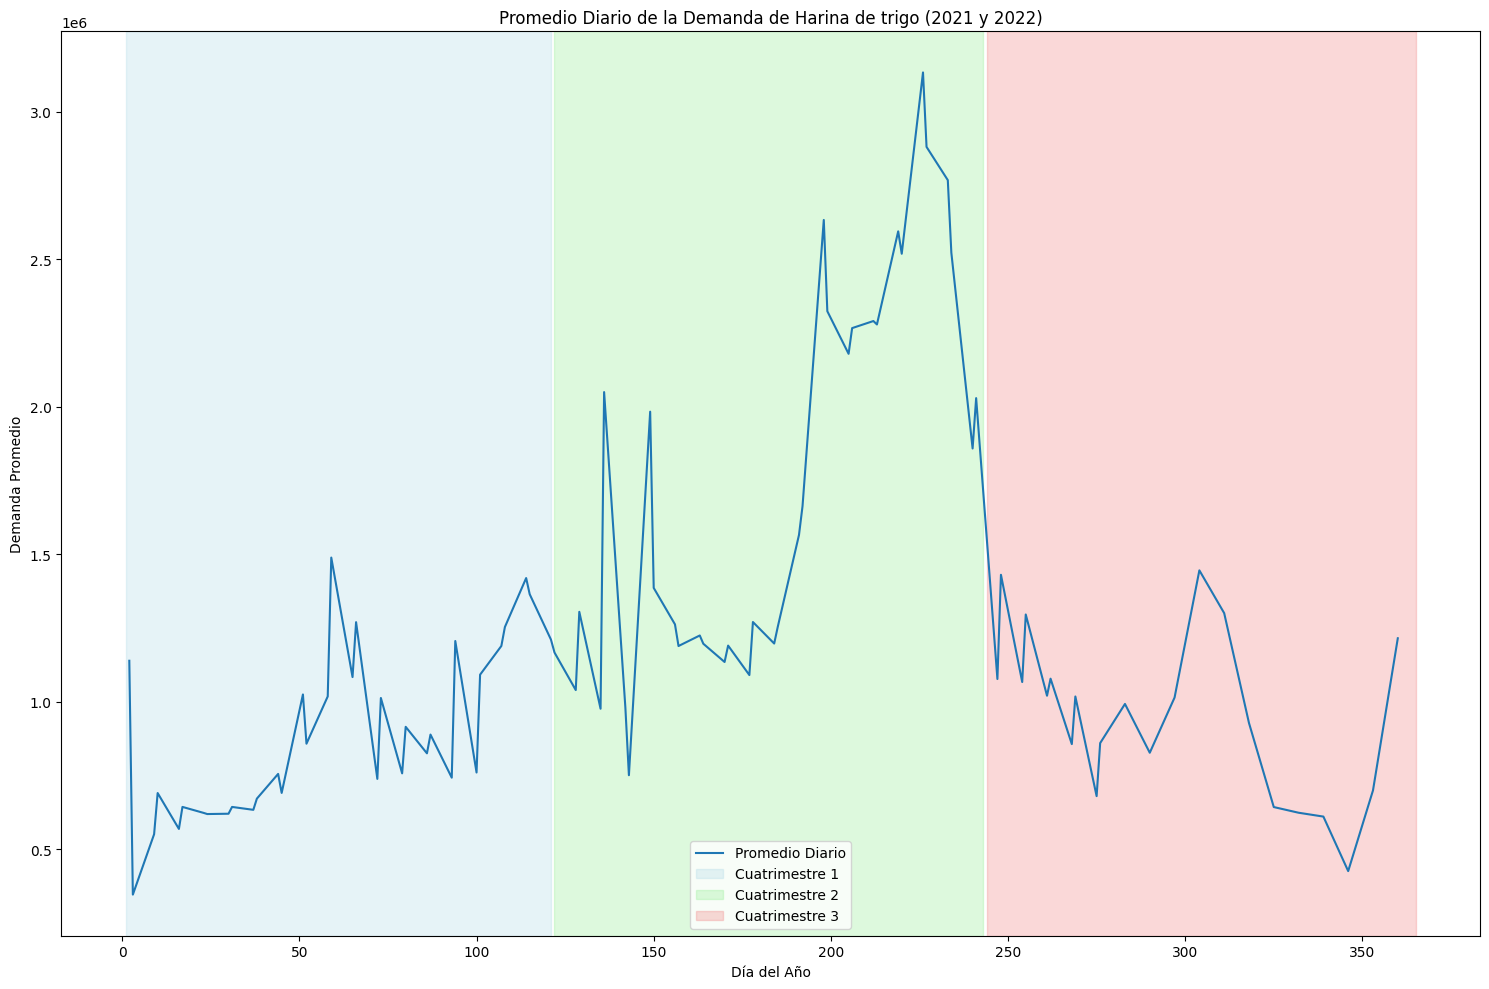

In [67]:
# Separar gráficamente la demanda en ventanas cuatrimestrales para una serie_id

# Definir la serie_id a utilizar
serie_id = "Harina de trigo"

# Filtrar los datos de la serie_id
serie = df_final[df_final["unique_id"] == serie_id].set_index("ds")["y"]

# Crear una nueva columna 'day_of_year' que representa el día del año (1 a 365)
serie.index = pd.to_datetime(serie.index)
serie = serie.reset_index()
serie['day_of_year'] = serie['ds'].dt.dayofyear

# Calcular el promedio de la demanda diaria para cada día del año
promedio_diario = serie.groupby('day_of_year')['y'].mean()

# Crear una figura para graficar el promedio diario
fig, ax = plt.subplots(figsize=(15, 10))

# Graficar el promedio diario
ax.plot(promedio_diario.index, promedio_diario.values, label="Promedio Diario")

# Añadir bandas de colores para los cuatrimestres
ax.axvspan(1, 121, color='lightblue', alpha=0.3, label='Cuatrimestre 1')
ax.axvspan(122, 243, color='lightgreen', alpha=0.3, label='Cuatrimestre 2')
ax.axvspan(244, 365, color='lightcoral', alpha=0.3, label='Cuatrimestre 3')

# Añadir títulos y etiquetas
ax.set_title(f"Promedio Diario de la Demanda de {serie_id} (2021 y 2022)")
ax.set_xlabel("Día del Año")
ax.set_ylabel("Demanda Promedio")
ax.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

# guardar total
promedio_diario.to_csv("../results/Bakery sales final with forecast.csv", index=False)

# guardar cuatrimestres
promedio_diario[:121].to_csv("../results/Bakery sales final with forecast 1.csv", index=False)
promedio_diario[122:243].to_csv("../results/Bakery sales final with forecast 2.csv", index=False)
promedio_diario[244:].to_csv("../results/Bakery sales final with forecast 3.csv", index=False)


Se podría considerar que la demanda de harina de trigo tiene una demanda normal en los cuatrimestres 1 y 3, y una demanda alta en el cuatrimestre 2.

# Modelo de inventario

En octave realizamos la implementación de un modelo de inventario estocástico.

```Matlab
# function [q, SR] = Estocastico(k, c1, c2, D, Ex, cbSRi, cbSi, eps, max_i)
# D     = E[d] o si es uniforme/constante D = d
# Ex    = E[x]
# cbSRi = funcion que toma un valor q y devuelve un valor real
# cbSi  = funcion que toma un valor SR y devuelve un valor real
# eps   = |SRi+1 - SRi| <= eps
# max_i = maxima cantidad de iteraciones
function [q, SR] = Estocastico(k, c1, c2, D, Ex, cbSRi, cbSi, eps, max_i)
  ux = Ex;
  
  disp("Iniciando...")
   
  q_circunflejo = c2*D/c1
  q_hat = (2*D*(k+c2*Ex)/c1)^0.5
  
  printf("¿Tiene solución? %s\n", mat2str(q_circunflejo >= q_hat))
  
  qi = 0;
  SRi = 0;
  Si = 0;
  
  i = 1;
  while (i <= max_i)    
    qi = (2*D*(k+c2*Si)/c1)**0.5;
    
    prevSRi = SRi;
    SRi = cbSRi(qi);
    Si = cbSi(SRi);
    
    printf("Iteracion: %d\tq%d=%f\tSR%d=%f\tS%d=%f\n",i,i,qi,i,SRi,i,Si);
    
    if (abs(SRi-prevSRi) <= eps)
      printf("Se detiene: |SRi - SRi+1| <= e  (%f <= %f)\n", abs(SRi-prevSRi), eps)
      break;
    endif
    
    i++;
  endwhile
  
  if (i > 1000)
    disp("Se detiene: se realizó mas de mil iteraciones sin éxito")
  endif
  
  q = qi;
  SR = SRi;
  
endfunction
```